<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DISFA-analysis" data-toc-modified-id="DISFA-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DISFA analysis</a></span><ul class="toc-item"><li><span><a href="#Scatter-plot-of-average-number-of-active-AUs-overtime-across-individuals" data-toc-modified-id="Scatter-plot-of-average-number-of-active-AUs-overtime-across-individuals-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Scatter plot of average number of active AUs overtime across individuals</a></span></li><li><span><a href="#Scatter-plot-of-average-frequency-for-each-AU-overtime-across-individuals" data-toc-modified-id="Scatter-plot-of-average-frequency-for-each-AU-overtime-across-individuals-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Scatter plot of average frequency for each AU overtime across individuals</a></span></li><li><span><a href="#Barplots-of-average-frequency-for-each-action-unit-across-individuals-and-time" data-toc-modified-id="Barplots-of-average-frequency-for-each-action-unit-across-individuals-and-time-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Barplots of average frequency for each action unit across individuals and time</a></span></li><li><span><a href="#Barplots-of-average-frequency-of-action-units-across-time-for-each-individual" data-toc-modified-id="Barplots-of-average-frequency-of-action-units-across-time-for-each-individual-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Barplots of average frequency of action units across time for each individual</a></span></li><li><span><a href="#Co-occurrence-of-action-units-across-individuals" data-toc-modified-id="Co-occurrence-of-action-units-across-individuals-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Co-occurrence of action units across individuals</a></span></li><li><span><a href="#Average-temporal-correlation-across-action-units-for-the-individuals" data-toc-modified-id="Average-temporal-correlation-across-action-units-for-the-individuals-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Average temporal correlation across action units for the individuals</a></span></li></ul></li><li><span><a href="#Cluster-extraction-for-PSM-and-GM-using-DBSCAN-for-each-individual" data-toc-modified-id="Cluster-extraction-for-PSM-and-GM-using-DBSCAN-for-each-individual-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cluster extraction for PSM and GM using DBSCAN for each individual</a></span></li><li><span><a href="#Behaviors-of-facial-movements-embedding-analysis-learned-from-General-Model." data-toc-modified-id="Behaviors-of-facial-movements-embedding-analysis-learned-from-General-Model.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Behaviors of facial movements embedding analysis learned from General Model.</a></span></li><li><span><a href="#Reconstruction-of-the-neutral-face-from-random-noise-experiments-from-both-General-and-Person-Specific-Models." data-toc-modified-id="Reconstruction-of-the-neutral-face-from-random-noise-experiments-from-both-General-and-Person-Specific-Models.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reconstruction of the neutral face from random noise experiments from both General and Person-Specific Models.</a></span></li></ul></div>

# DISFA analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

with open('../Results/summary_DISFA_dataset.pickle', 'rb') as handle:
    summary_DISFA = pickle.load(handle)
    
episodes = [list(range(60,280)),list(range(340,740)),
            list(range(800,1160)),list(range(1220,1340)),
            list(range(1400,1860)),list(range(1940,2460)),
            list(range(2520,3200)),list(range(3260,3920)),
            list(range(4000,4844))]
AUs = ['au'+str(i) for i in [1,2,4,5,6,9,12,15,17,20,25,26]]

colors_aus = dict()
colors_aus['au1'] = "blue"
colors_aus['au2'] = "green"
colors_aus['au4'] = "red"
colors_aus['au5'] = "grey"
colors_aus['au6'] = "black"
colors_aus['au9'] = "yellow"
colors_aus['au12'] = "cyan"
colors_aus['au15'] = "magenta"
colors_aus['au17'] = "brown"
colors_aus['au20'] = "purple"
colors_aus['au25'] = "lavender"
colors_aus['au26'] = "rosybrown"

SNs = ['SN001','SN002','SN003','SN004','SN005','SN006','SN007','SN008','SN009',
       'SN010','SN011','SN012','SN013','SN016','SN017','SN018','SN021','SN023',
       'SN024','SN025','SN026','SN027','SN028','SN029','SN030','SN031','SN032']


## Scatter plot of average number of active AUs overtime across individuals

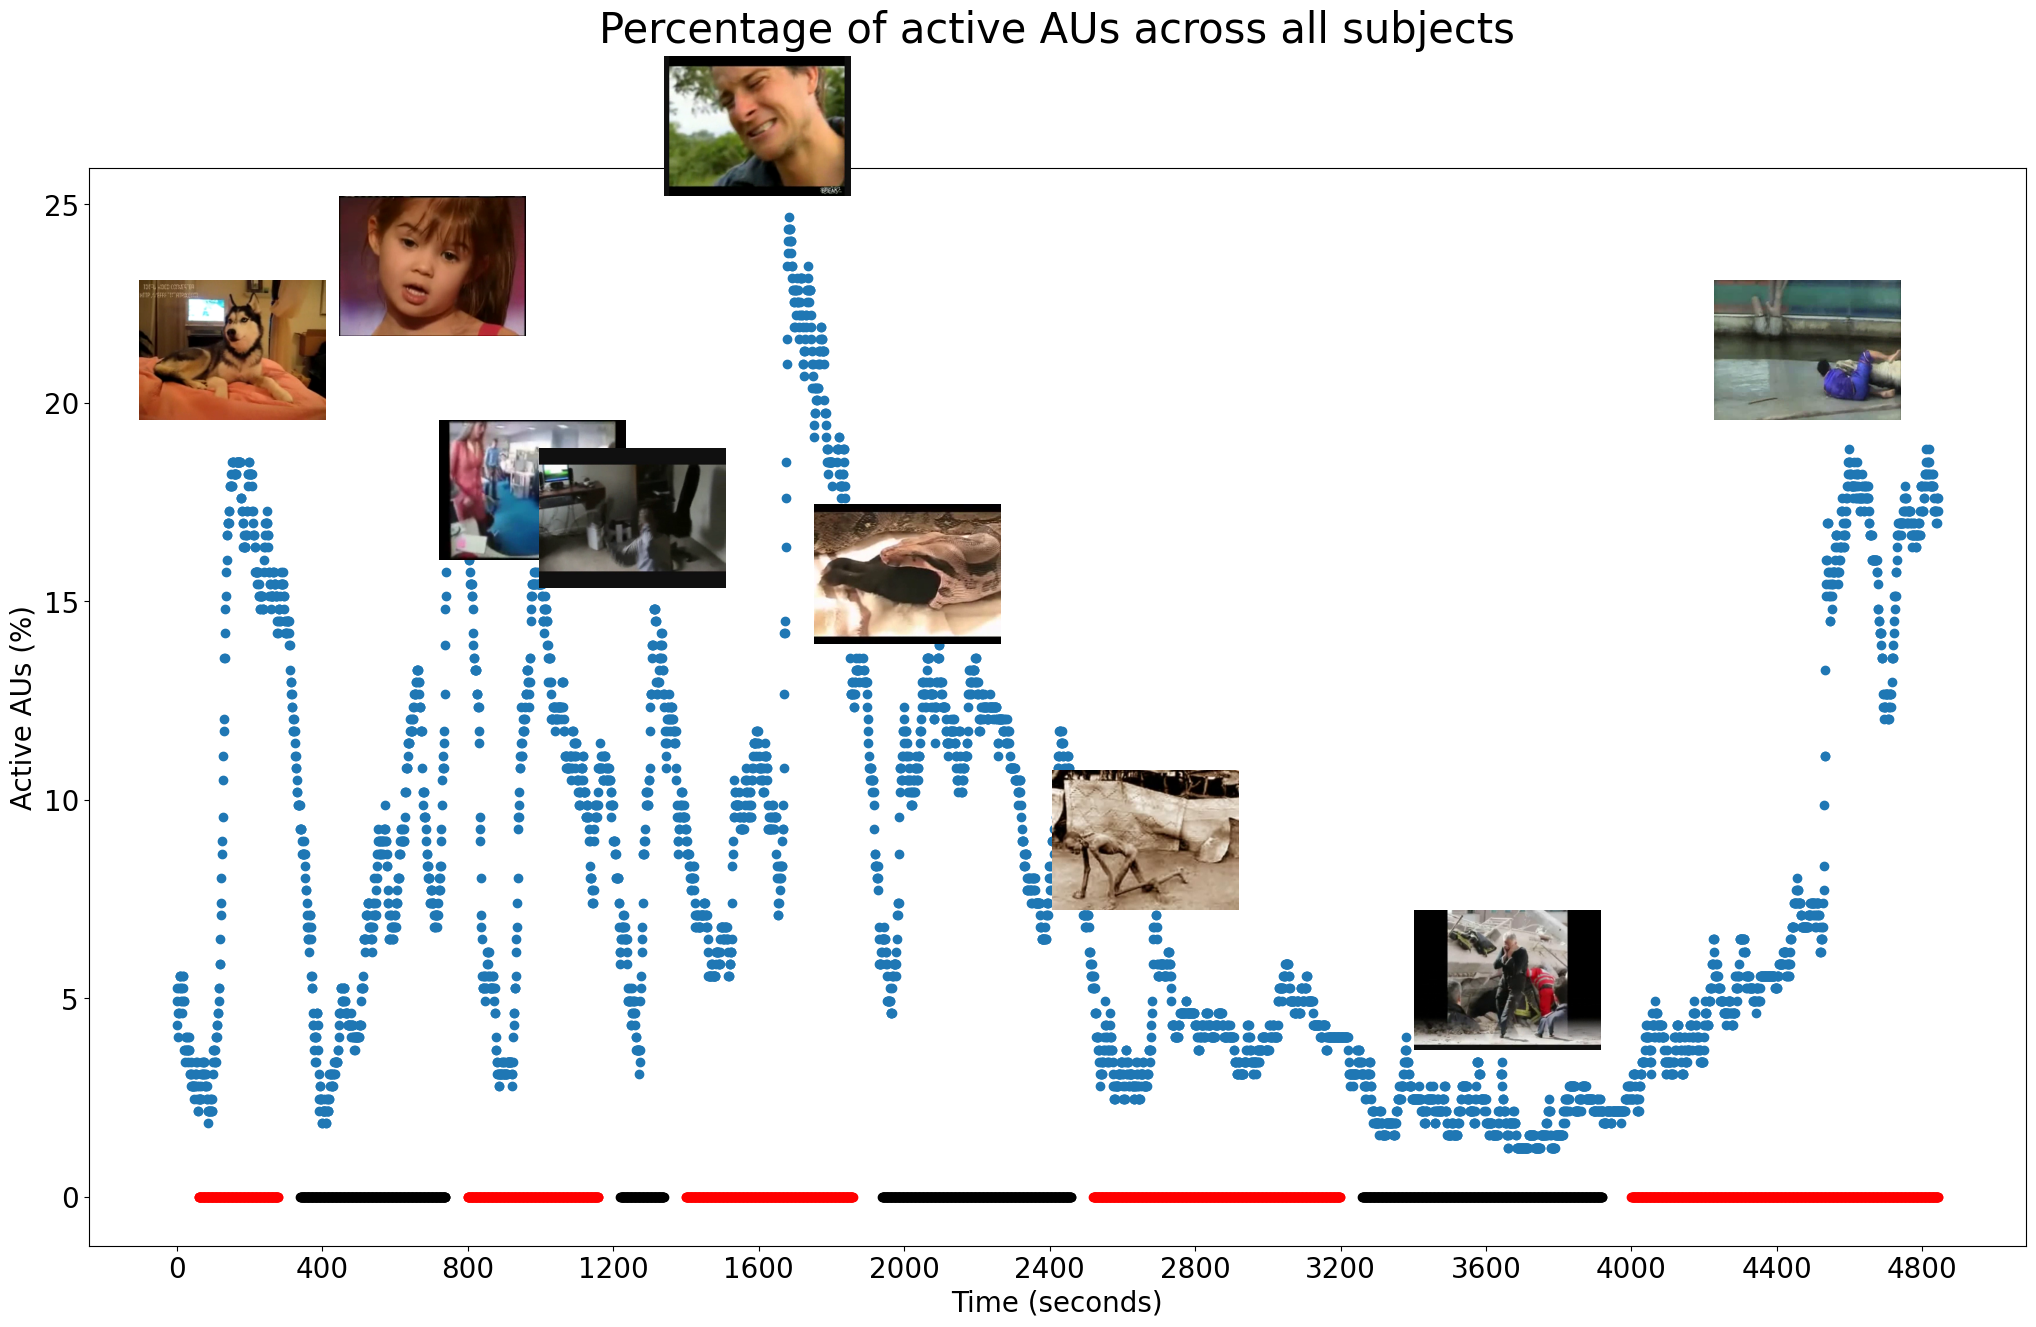

In [2]:


imgs = summary_DISFA["images"]

imgs_locations = [[0.12,0.7,0.1,0.1],[0.2,0.76,0.1,0.1],[0.24,0.6,0.1,0.1],
                  [0.28,0.58,0.1,0.1],[0.33,0.86,0.1,0.1],[0.39,0.54,0.1,0.1],
                  [0.485,0.35,0.1,0.1],[0.63,0.25,0.1,0.1],[0.75,0.7,0.1,0.1]]

fig, ax = plt.subplots(figsize=(25,14))

ax.scatter(list(range(4844)),
           summary_DISFA['active_AUs_across_SNs_overtime'],marker="o")
color = "red"

for ep in episodes :
  ax.scatter(ep,y=[0 for i in range(len(ep))],color=color)
  color = "red" if color =="black" else "black"

plt.title("Percentage of active AUs across all subjects",fontsize=30,pad=90)
plt.ylabel("Active AUs (%)",fontsize=20)
plt.xlabel("Time (seconds)",fontsize=20)
plt.xticks(np.arange(0,5000,400),fontsize=20)
plt.yticks(fontsize=20)
for i in range(9):
    newax = fig.add_axes(imgs_locations[i], anchor='NE', zorder=1)
    newax.imshow(imgs[i])
    newax.axis('off')
plt.show()

## Scatter plot of average frequency for each AU overtime across individuals

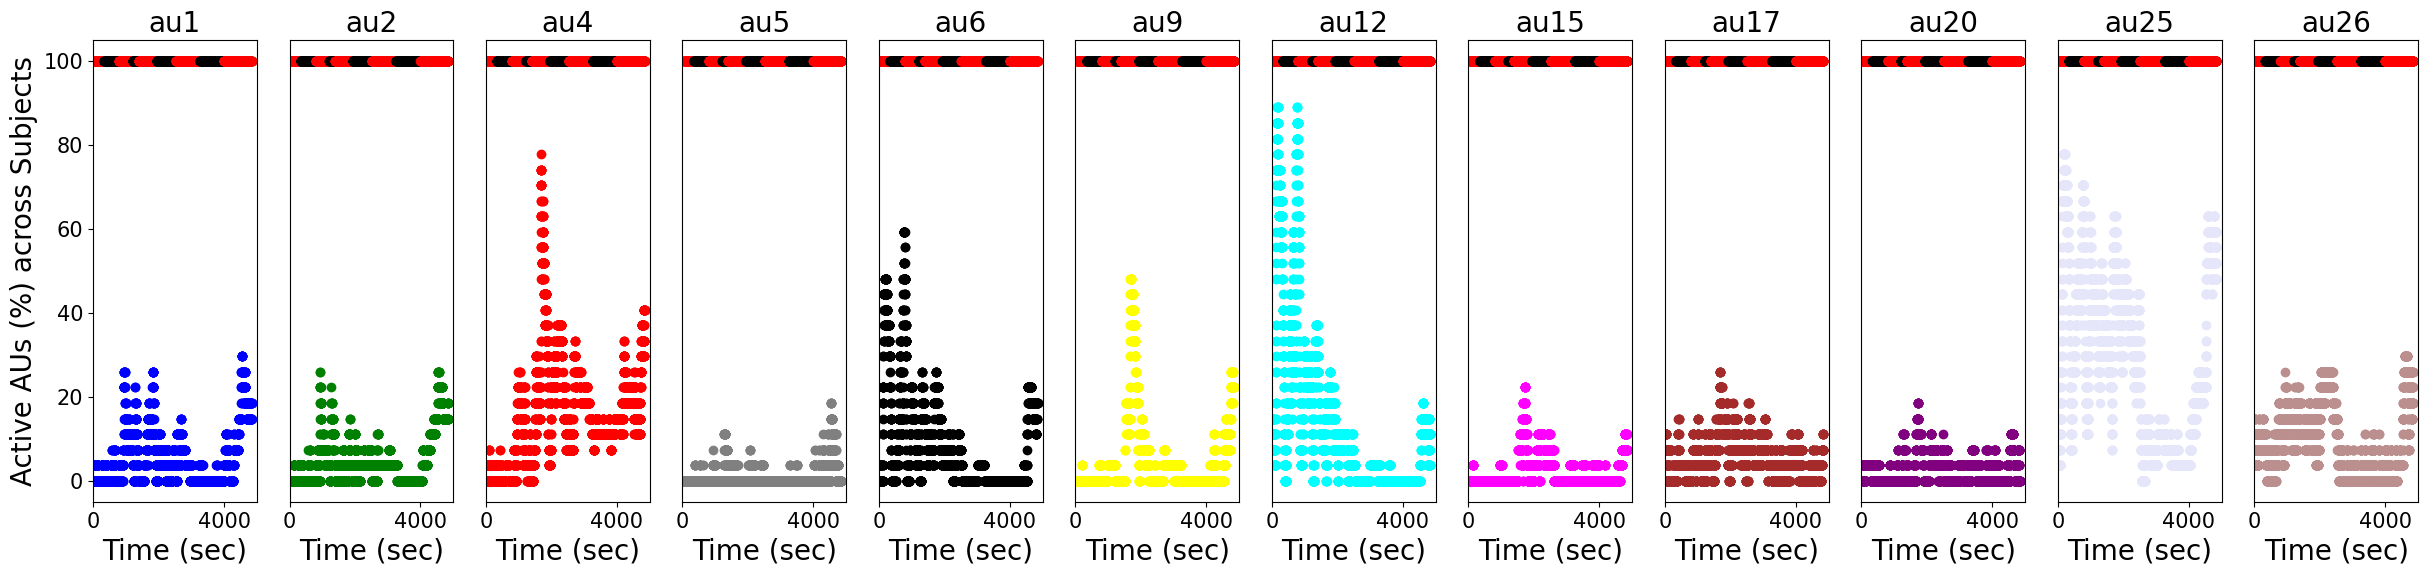

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=12,figsize=(30,6))
count = 0
for au in AUs:
  axes[count].scatter(list(range(4844)),summary_DISFA["active_"+au+"_across_SNs"],marker="o",label=au,color=colors_aus[au])   
  color = "red"
  for ep in episodes :
    axes[count].scatter(ep,y=[100 for i in range(len(ep))],color=color)
    color = "red" if color =="black" else "black"
  axes[count].set_xlim(0,5000)
  if count==0:
    axes[count].set_ylabel("Active AUs (%) across Subjects",fontsize=20)
  else:
    axes[count].set_yticks([])
    
  axes[count].tick_params(axis='both', which='major', labelsize=15) 
  axes[count].set_xticks([0,4000])
  axes[count].set_title(au,fontsize=20)
  axes[count].set_xlabel("Time (sec)",fontsize=20)
  count+=1
plt.show()

## Barplots of average frequency for each action unit across individuals and time

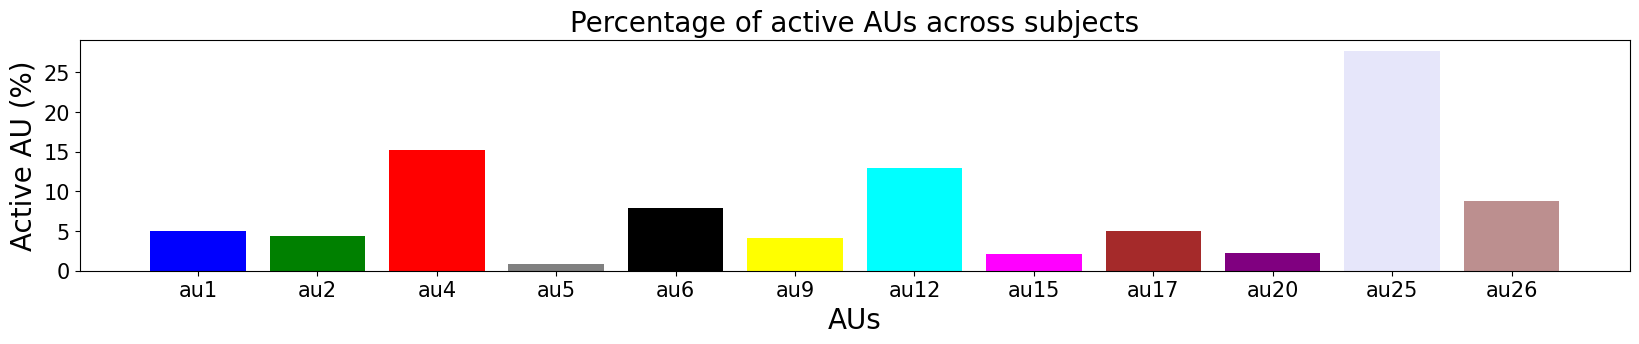

In [4]:
plt.figure(figsize=(20,3))
sum_all_SNs_per_AU = summary_DISFA["active_AUs_across_SNs_overall"] 
plt.bar(AUs,sum_all_SNs_per_AU,color=list(colors_aus.values()))
plt.title("Percentage of active AUs across subjects",fontsize=20)
plt.ylabel("Active AU (%)",fontsize=20)
plt.xlabel("AUs",fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## Barplots of average frequency of action units across time for each individual

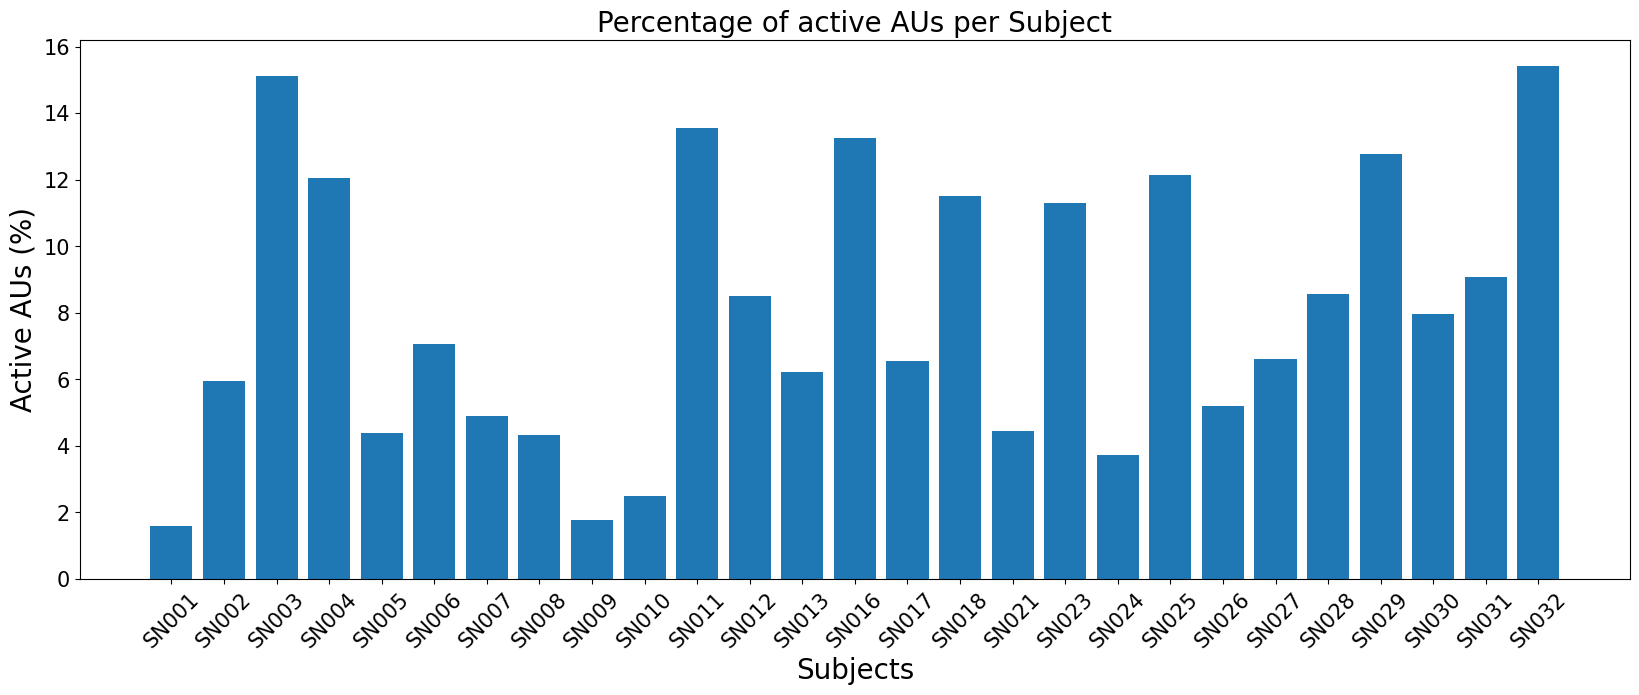

In [5]:
plt.figure(figsize=(20,7))
sum_all_AUs_per_SN = summary_DISFA["active_AUs_per_SN"]
plt.bar(SNs,sum_all_AUs_per_SN)
plt.title("Percentage of active AUs per Subject",fontsize=20)
plt.xlabel("Subjects",fontsize=20)
plt.ylabel("Active AUs (%)",fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=45)
plt.show()

## Co-occurrence of action units across individuals

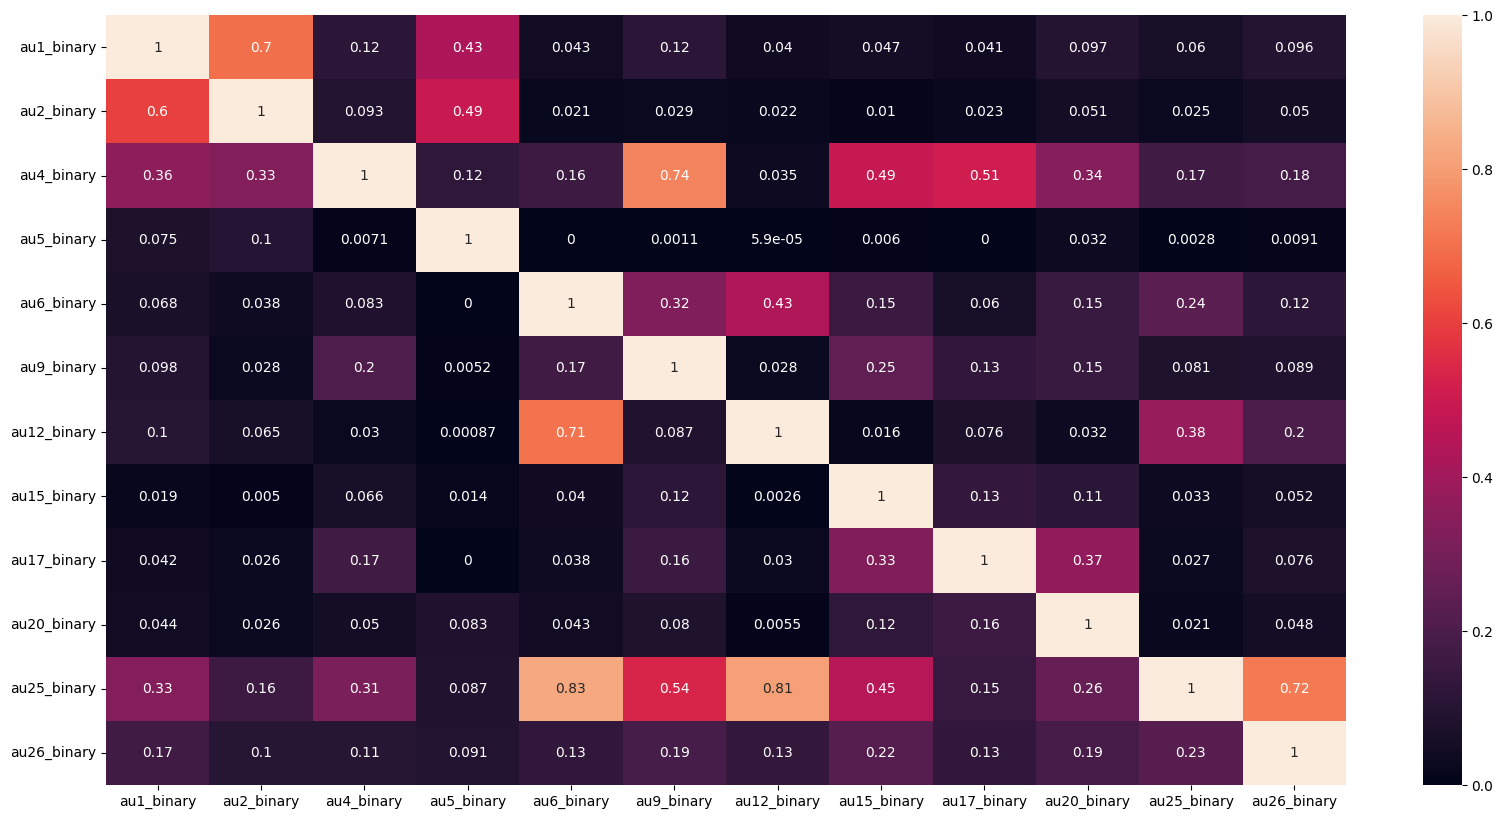

In [6]:
plt.figure(figsize=(20,10))

sns.heatmap(summary_DISFA["AUs_co_occurence"], annot=True)
plt.show()

## Average temporal correlation across action units for the individuals

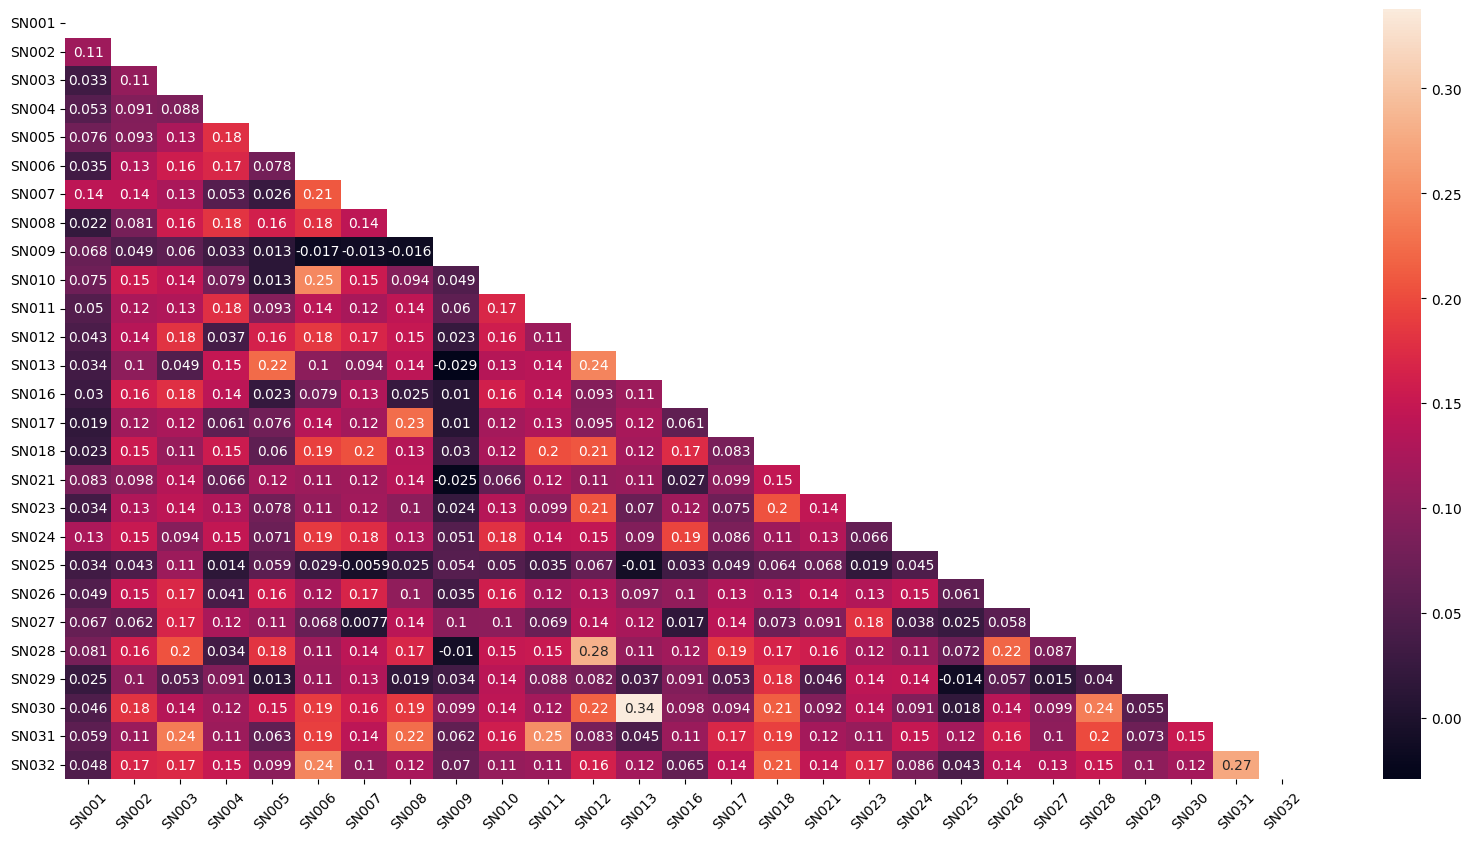

In [7]:
plt.figure(figsize=(20,10))

mask = np.triu(np.ones_like(summary_DISFA["avg_temporal_correlation_across_SNs"]))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(summary_DISFA["avg_temporal_correlation_across_SNs"], annot=True, mask=mask)
 
# displaying heatmap
plt.xticks(rotation=45)
plt.show()


# Cluster extraction for PSM and GM using DBSCAN for each individual

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from collections import Counter
import pandas as pd
import numpy as np
import pickle
SNs = ['SN001','SN002','SN003','SN004','SN005','SN006','SN007','SN008','SN009',
       'SN010','SN011','SN012','SN013','SN016','SN017','SN018','SN021','SN023',
       'SN024','SN025','SN026','SN027','SN028','SN029','SN030','SN031','SN032']

AUs= ["au"+str(i) for i in [1,2,4,5,6,9,12,15,17,20,25,26]]

colors_aus = dict()
colors_aus['au1'] = "blue"
colors_aus['au2'] = "green"
colors_aus['au4'] = "red"
colors_aus['au5'] = "grey"
colors_aus['au6'] = "black"
colors_aus['au9'] = "yellow"
colors_aus['au12'] = "cyan"
colors_aus['au15'] = "magenta"
colors_aus['au17'] = "brown"
colors_aus['au20'] = "purple"
colors_aus['au25'] = "lavender"
colors_aus['au26'] = "rosybrown"
colors_aus['None'] = "mistyrose"

with open('../Results/PSM_and_GM_clusters.pickle', 'rb') as handle:
    dict_clusters = pickle.load(handle)
    

SN001


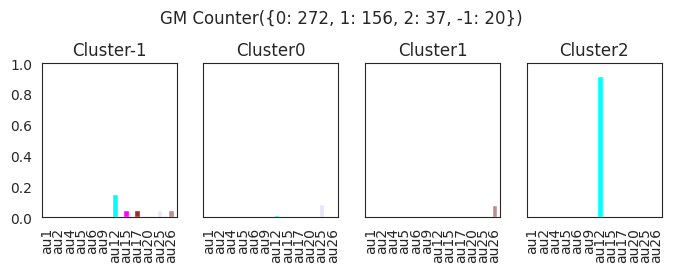

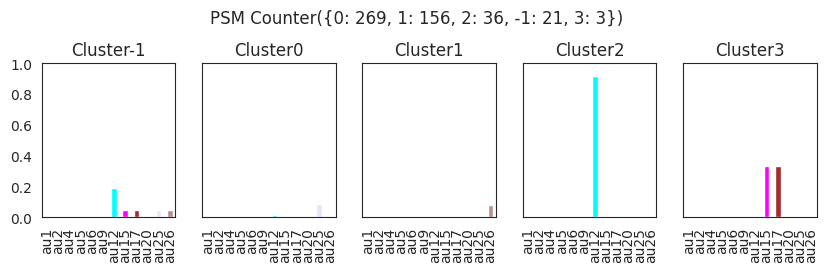

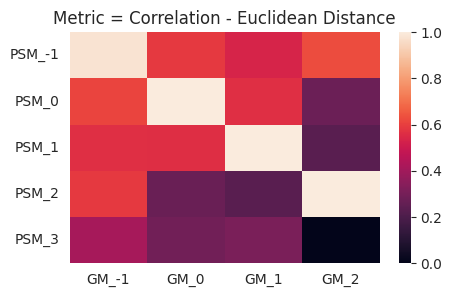

+--------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_1 |     GM_2 |
|--------+----------+----------+----------+----------|
| PSM_-1 | 0.978327 | 0.589084 | 0.532526 | 0.628798 |
| PSM_0  | 0.613222 | 0.99618  | 0.565924 | 0.276167 |
| PSM_1  | 0.56581  | 0.560808 | 1        | 0.232932 |
| PSM_2  | 0.587797 | 0.272018 | 0.23376  | 0.999172 |
| PSM_3  | 0.411674 | 0.289639 | 0.309509 | 0        |
+--------+----------+----------+----------+----------+
Novel Clusters from PSM : ['PSM_3']
Novel Clusters from GM : []
SN002


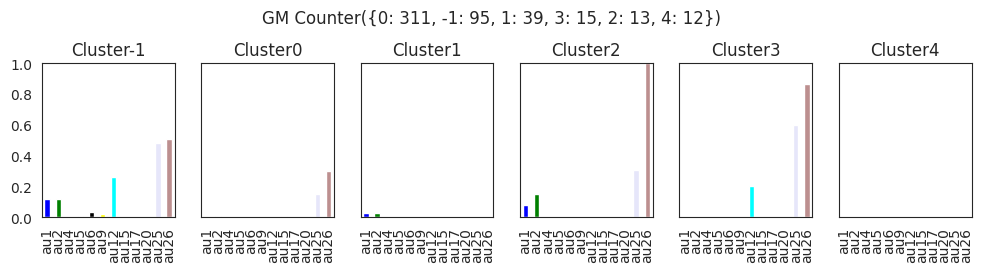

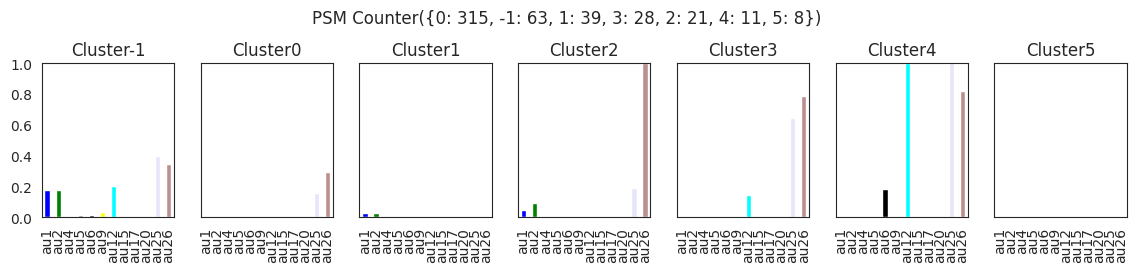

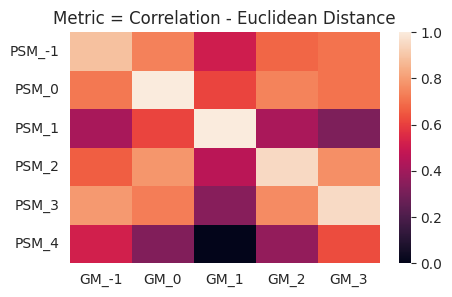

+--------+----------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_1 |     GM_2 |     GM_3 |
|--------+----------+----------+----------+----------+----------|
| PSM_-1 | 0.888758 | 0.737535 | 0.510934 | 0.677025 | 0.703143 |
| PSM_0  | 0.717418 | 0.998757 | 0.610439 | 0.739579 | 0.706294 |
| PSM_1  | 0.415769 | 0.609974 | 1        | 0.420623 | 0.320238 |
| PSM_2  | 0.663856 | 0.783149 | 0.457804 | 0.950798 | 0.766485 |
| PSM_3  | 0.790839 | 0.726893 | 0.343097 | 0.759825 | 0.956972 |
| PSM_4  | 0.518769 | 0.325058 | 0        | 0.367964 | 0.626876 |
+--------+----------+----------+----------+----------+----------+
Novel Clusters from PSM : ['PSM_4']
Novel Clusters from GM : []
SN003


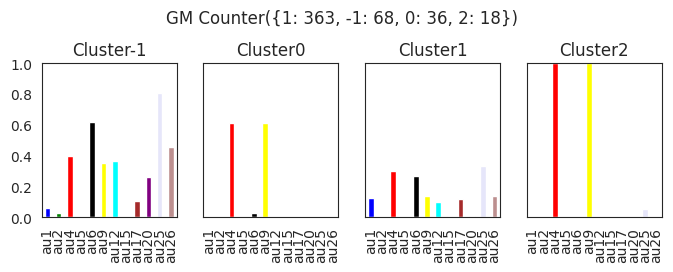

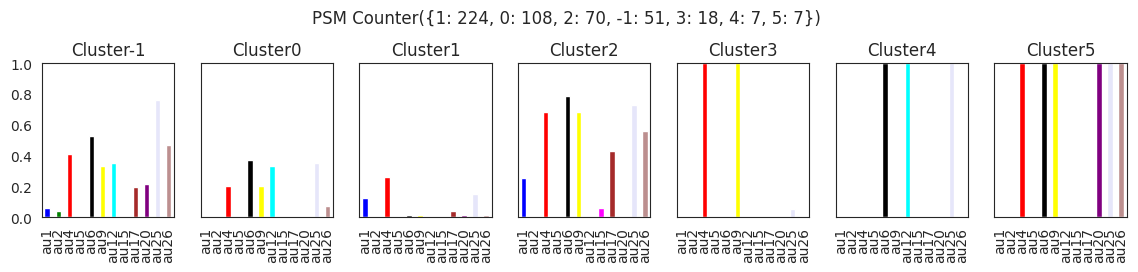

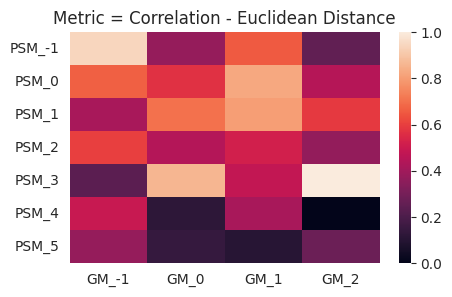

+--------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_1 |     GM_2 |
|--------+----------+----------+----------+----------|
| PSM_-1 | 0.941777 | 0.371263 | 0.654902 | 0.252435 |
| PSM_0  | 0.665948 | 0.567965 | 0.825032 | 0.447027 |
| PSM_1  | 0.414692 | 0.703113 | 0.803815 | 0.5883   |
| PSM_2  | 0.599275 | 0.443308 | 0.516678 | 0.370464 |
| PSM_3  | 0.236845 | 0.860461 | 0.478786 | 1        |
| PSM_4  | 0.490166 | 0.120708 | 0.417612 | 0        |
| PSM_5  | 0.371963 | 0.144196 | 0.103056 | 0.274919 |
+--------+----------+----------+----------+----------+
Novel Clusters from PSM : ['PSM_2', 'PSM_4', 'PSM_5']
Novel Clusters from GM : []
SN005


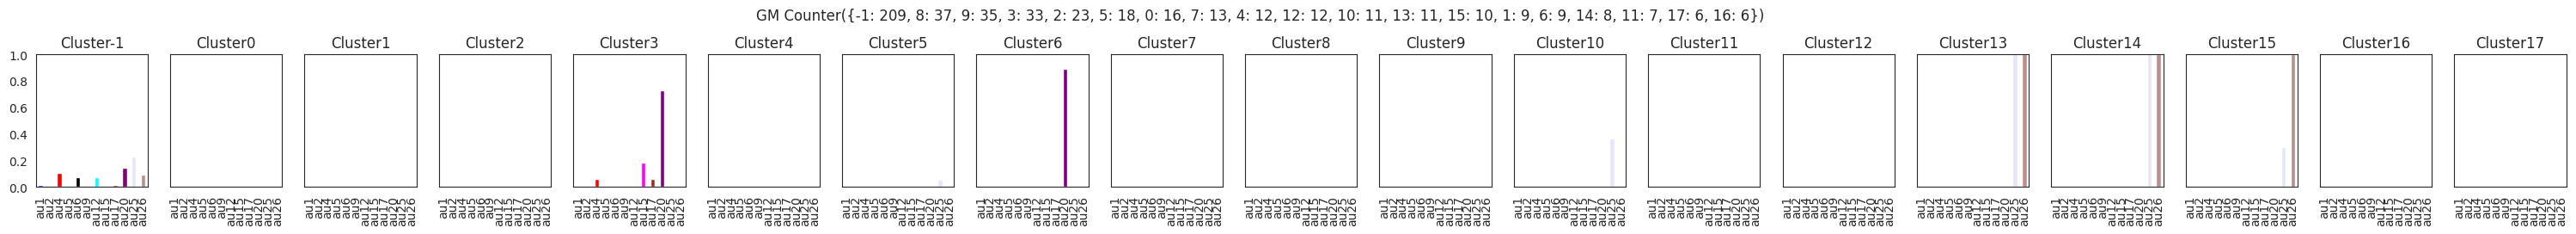

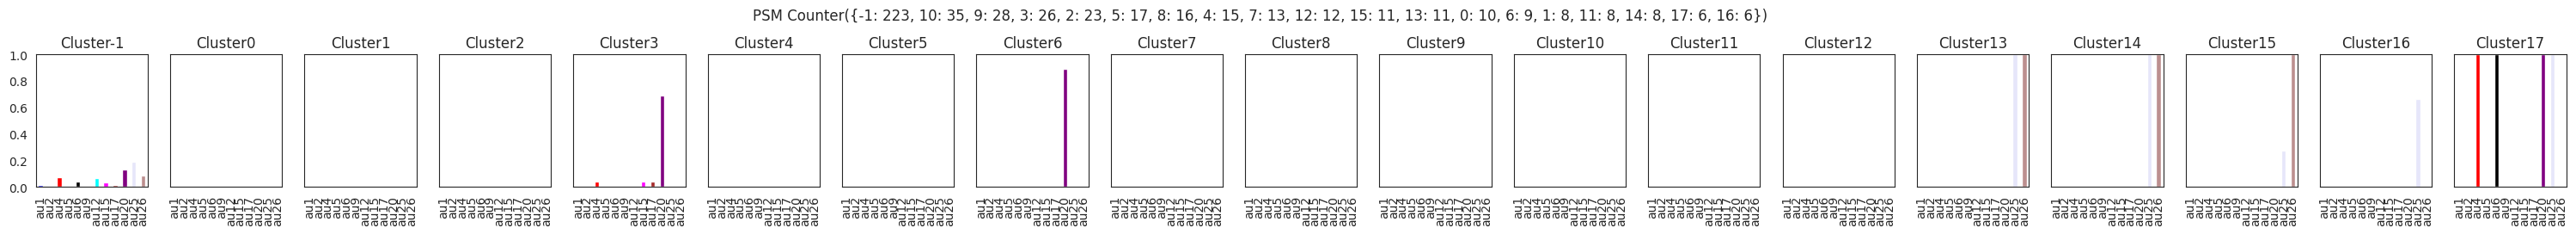

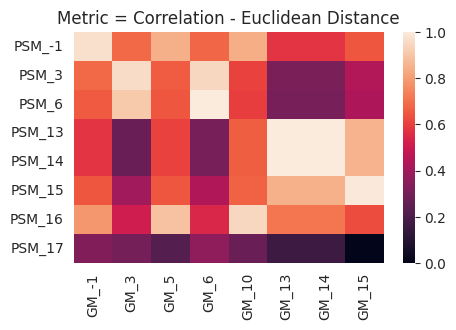

+--------+----------+----------+----------+----------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_3 |     GM_5 |     GM_6 |    GM_10 |    GM_13 |    GM_14 |    GM_15 |
|--------+----------+----------+----------+----------+----------+----------+----------+----------|
| PSM_-1 | 0.971488 | 0.68449  | 0.847221 | 0.67735  | 0.841422 | 0.575792 | 0.575792 | 0.647419 |
| PSM_3  | 0.686281 | 0.958245 | 0.659301 | 0.945411 | 0.606035 | 0.31415  | 0.31415  | 0.438993 |
| PSM_6  | 0.652576 | 0.913802 | 0.648095 | 1        | 0.594828 | 0.304311 | 0.304311 | 0.428572 |
| PSM_13 | 0.574473 | 0.270011 | 0.607483 | 0.304311 | 0.660749 | 1        | 1        | 0.854996 |
| PSM_14 | 0.574473 | 0.270011 | 0.607483 | 0.304311 | 0.660749 | 1        | 1        | 0.854996 |
| PSM_15 | 0.646458 | 0.400807 | 0.647712 | 0.433607 | 0.669542 | 0.847913 | 0.847913 | 0.995225 |
| PSM_16 | 0.786393 | 0.511345 | 0.894341 | 0.542436 | 0.947607 | 0.713142 | 0.713142 | 0.626338 |
| PSM_17 |

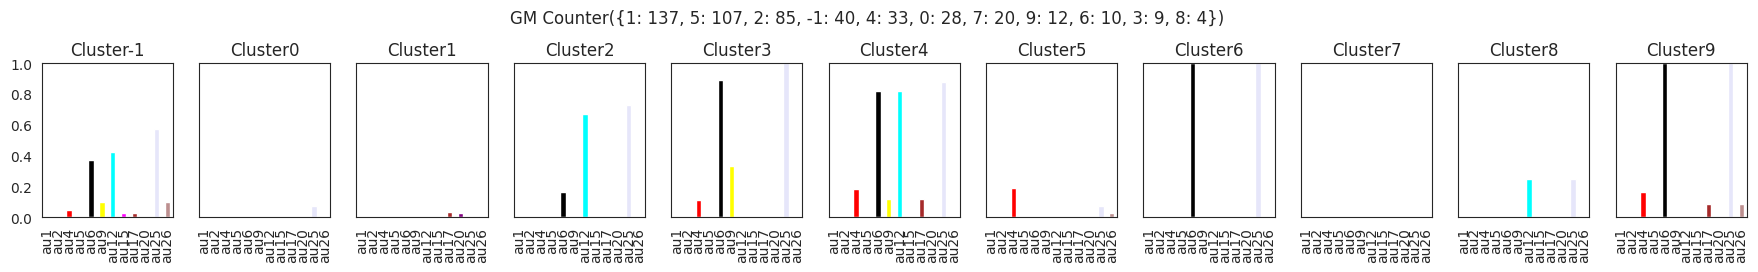

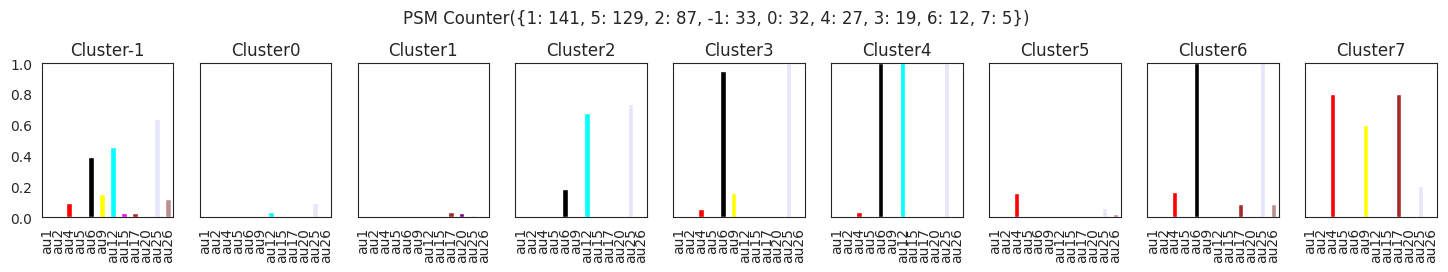

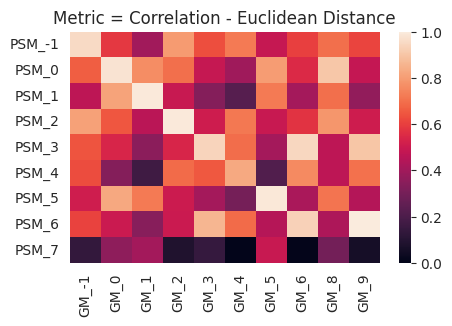

+--------+----------+----------+----------+-----------+----------+----------+----------+------------+----------+-----------+
|        |    GM_-1 |     GM_0 |     GM_1 |      GM_2 |     GM_3 |     GM_4 |     GM_5 |       GM_6 |     GM_8 |      GM_9 |
|--------+----------+----------+----------+-----------+----------+----------+----------+------------+----------+-----------|
| PSM_-1 | 0.954108 | 0.585586 | 0.398827 | 0.79663   | 0.629337 | 0.721706 | 0.487611 | 0.597881   | 0.695682 | 0.610779  |
| PSM_0  | 0.663731 | 0.97919  | 0.761796 | 0.698947  | 0.487622 | 0.396409 | 0.800364 | 0.550076   | 0.903581 | 0.482641  |
| PSM_1  | 0.468478 | 0.816231 | 0.995638 | 0.488475  | 0.334399 | 0.22408  | 0.72192  | 0.408106   | 0.69856  | 0.364432  |
| PSM_2  | 0.81015  | 0.645208 | 0.457139 | 0.993577  | 0.505292 | 0.716687 | 0.488783 | 0.573893   | 0.783629 | 0.504472  |
| PSM_3  | 0.642311 | 0.53614  | 0.349173 | 0.536965  | 0.94118  | 0.693356 | 0.40916  | 0.947484   | 0.465986 | 0.901682  |


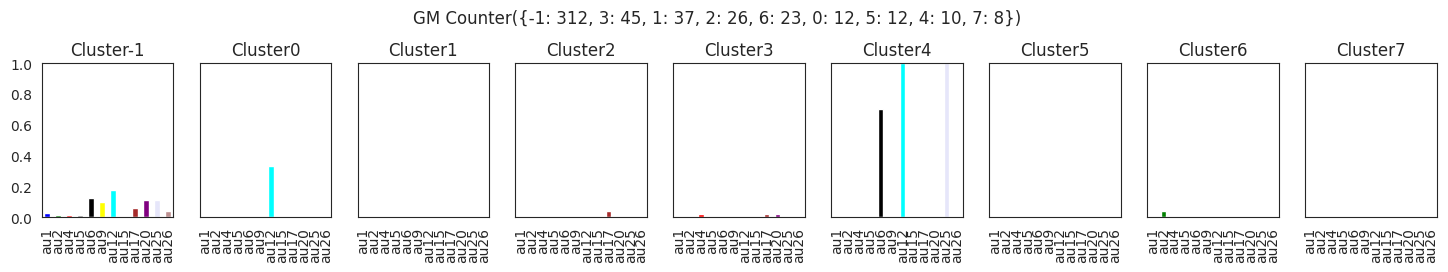

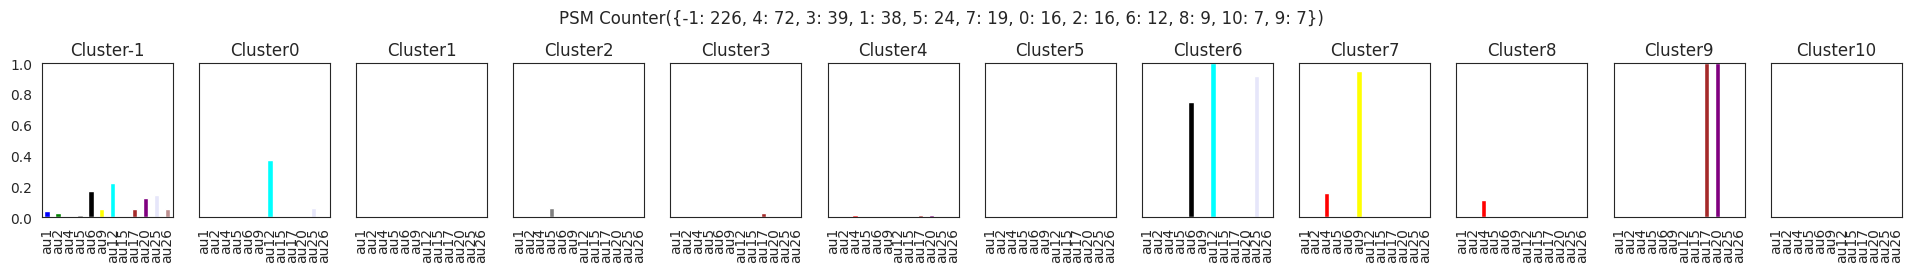

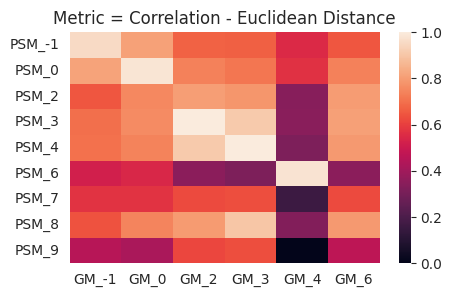

+--------+----------+----------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_2 |     GM_3 |     GM_4 |     GM_6 |
|--------+----------+----------+----------+----------+----------+----------|
| PSM_-1 | 0.955059 | 0.809984 | 0.670144 | 0.665991 | 0.549312 | 0.645834 |
| PSM_0  | 0.815007 | 0.982285 | 0.735857 | 0.714757 | 0.569027 | 0.735012 |
| PSM_2  | 0.64632  | 0.751916 | 0.801548 | 0.782802 | 0.340042 | 0.800703 |
| PSM_3  | 0.697787 | 0.75812  | 1        | 0.913686 | 0.346246 | 0.806907 |
| PSM_4  | 0.701198 | 0.741424 | 0.912931 | 0.99795  | 0.317174 | 0.790211 |
| PSM_6  | 0.518793 | 0.542735 | 0.349492 | 0.31818  | 0.979322 | 0.348647 |
| PSM_7  | 0.570325 | 0.573831 | 0.623462 | 0.629401 | 0.159682 | 0.622618 |
| PSM_8  | 0.638138 | 0.743734 | 0.793366 | 0.8993   | 0.33186  | 0.792521 |
| PSM_9  | 0.451369 | 0.418411 | 0.617164 | 0.631329 | 0        | 0.467198 |
+--------+----------+----------+----------+----------+----------+----------+

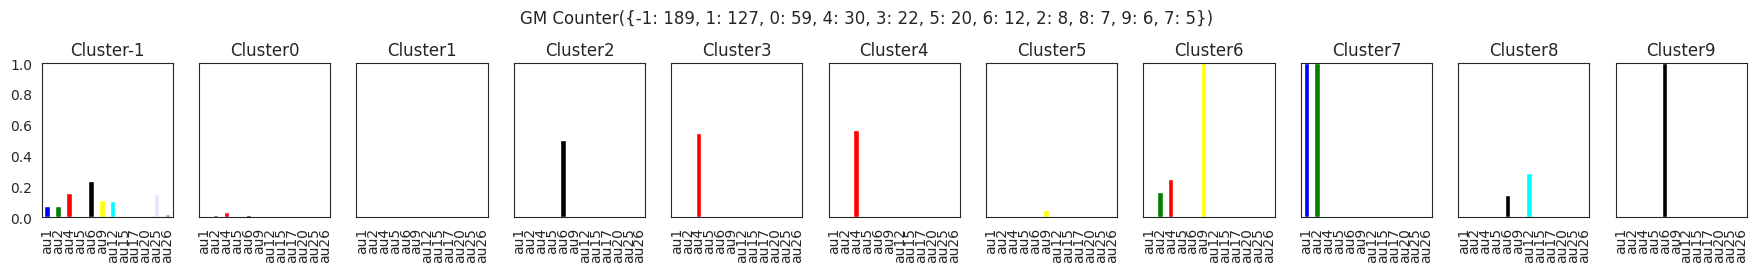

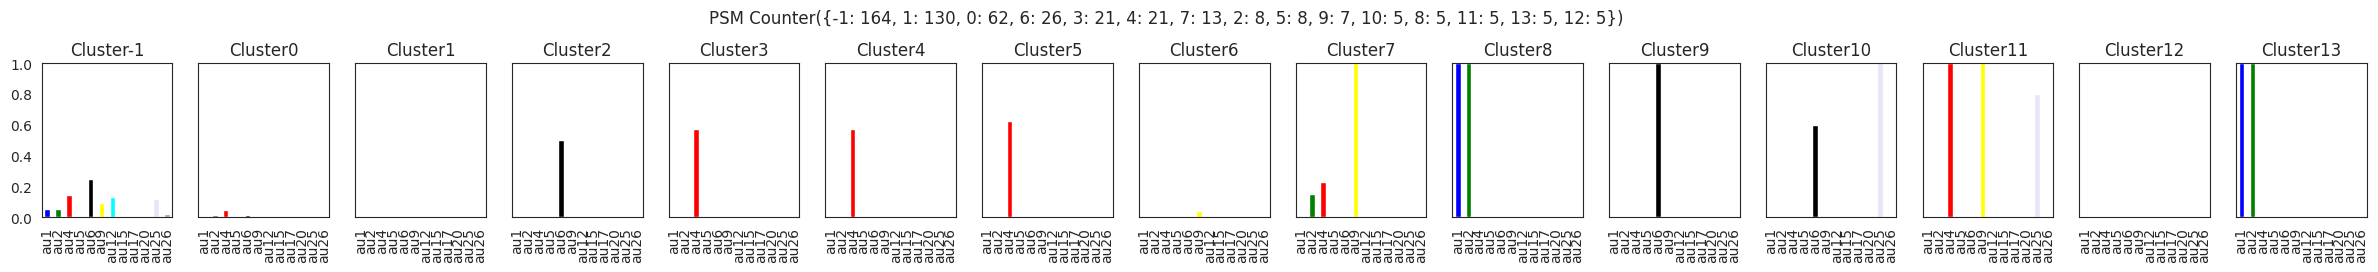

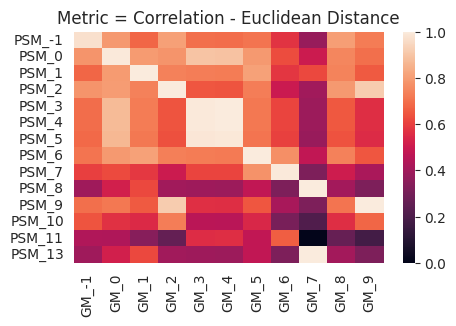

+--------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_1 |     GM_2 |     GM_3 |     GM_4 |     GM_5 |     GM_6 |     GM_7 |     GM_8 |     GM_9 |
|--------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------|
| PSM_-1 | 0.970631 | 0.790715 | 0.67751  | 0.807944 | 0.696224 | 0.692722 | 0.709166 | 0.573724 | 0.376095 | 0.802818 | 0.725387 |
| PSM_0  | 0.77993  | 0.994334 | 0.796208 | 0.77803  | 0.896684 | 0.893181 | 0.789252 | 0.627751 | 0.50381  | 0.74943  | 0.695474 |
| PSM_1  | 0.678807 | 0.795812 | 0.99997  | 0.73605  | 0.728545 | 0.725043 | 0.810351 | 0.578516 | 0.61725  | 0.741941 | 0.653494 |
| PSM_2  | 0.780681 | 0.799954 | 0.73602  | 1        | 0.647259 | 0.643756 | 0.729065 | 0.497229 | 0.399841 | 0.791483 | 0.917444 |
| PSM_3  | 0.693642 | 0.873589 | 0.724226 | 0.64297  | 0.995711 | 0.999214 |

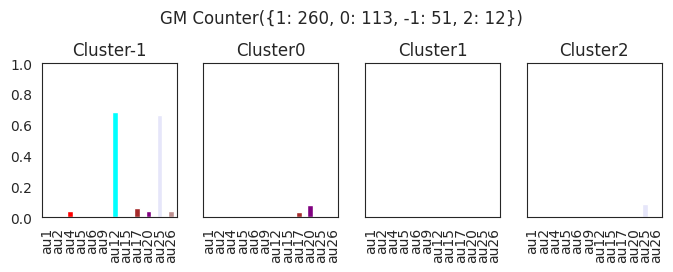

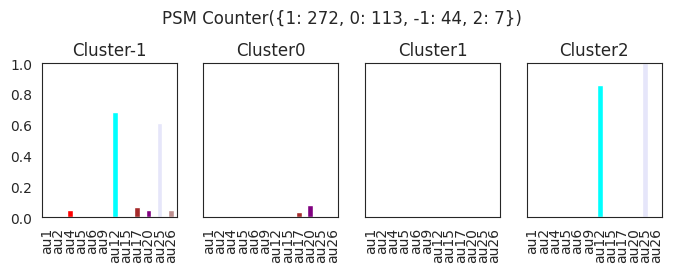

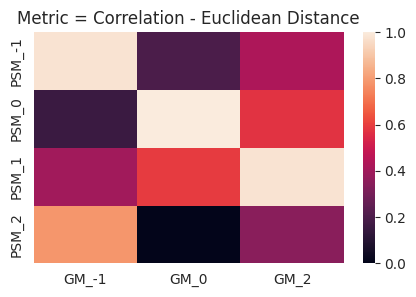

+--------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_2 |
|--------+----------+----------+----------|
| PSM_-1 | 0.976672 | 0.196739 | 0.425832 |
| PSM_0  | 0.152478 | 1        | 0.570856 |
| PSM_1  | 0.401521 | 0.59022  | 0.978929 |
| PSM_2  | 0.781928 | 0        | 0.345257 |
+--------+----------+----------+----------+
Novel Clusters from PSM : ['PSM_2']
Novel Clusters from GM : []
SN010


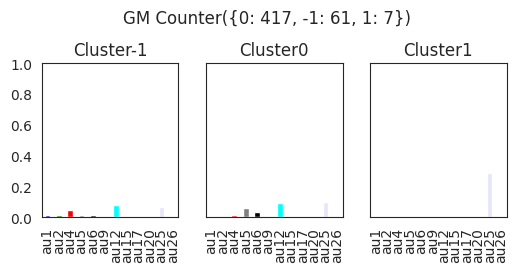

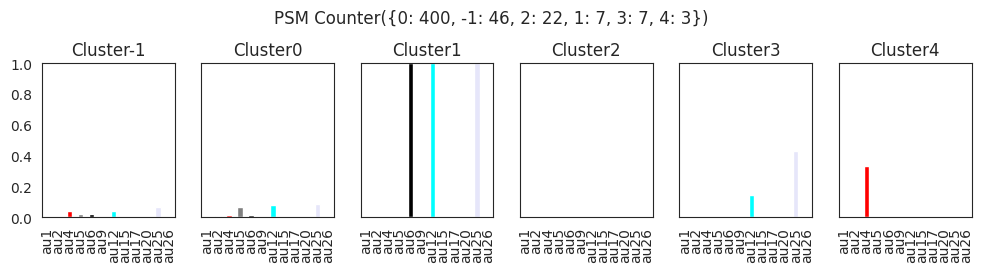

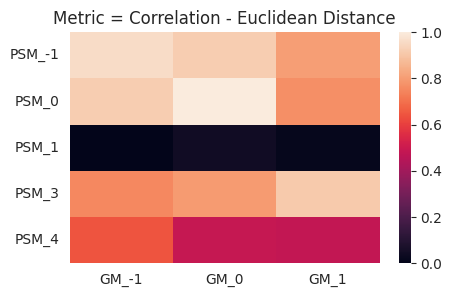

+--------+----------+-----------+-----------+
|        |    GM_-1 |      GM_0 |      GM_1 |
|--------+----------+-----------+-----------|
| PSM_-1 | 0.959072 | 0.921498  | 0.804406  |
| PSM_0  | 0.921801 | 1         | 0.765808  |
| PSM_1  | 0        | 0.0445927 | 0.0133862 |
| PSM_3  | 0.752215 | 0.793845  | 0.911407  |
| PSM_4  | 0.642835 | 0.485371  | 0.479988  |
+--------+----------+-----------+-----------+
Novel Clusters from PSM : ['PSM_1', 'PSM_4']
Novel Clusters from GM : []
SN011


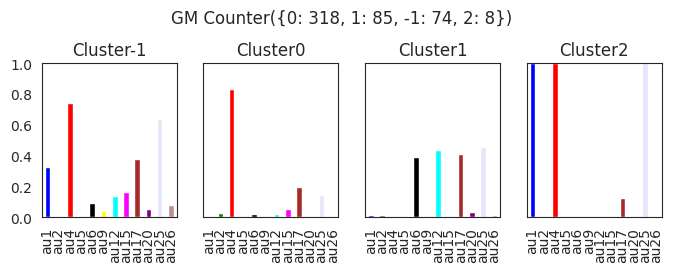

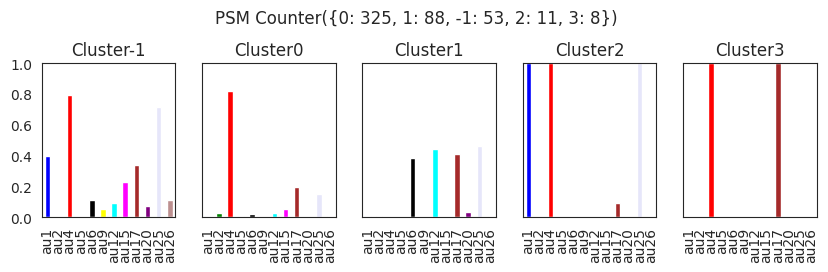

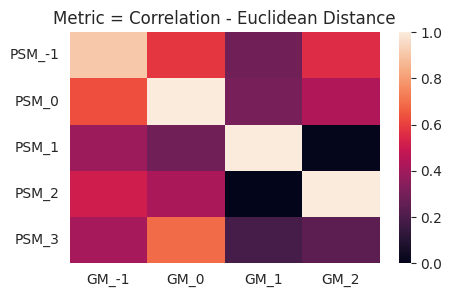

+--------+----------+----------+----------+-----------+
|        |    GM_-1 |     GM_0 |     GM_1 |      GM_2 |
|--------+----------+----------+----------+-----------|
| PSM_-1 | 0.909436 | 0.578832 | 0.287338 | 0.555549  |
| PSM_0  | 0.630855 | 0.997459 | 0.302996 | 0.433128  |
| PSM_1  | 0.387816 | 0.292015 | 1        | 0.0112089 |
| PSM_2  | 0.512022 | 0.425477 | 0        | 0.997358  |
| PSM_3  | 0.41035  | 0.68944  | 0.187341 | 0.240489  |
+--------+----------+----------+----------+-----------+
Novel Clusters from PSM : ['PSM_3']
Novel Clusters from GM : []
SN012


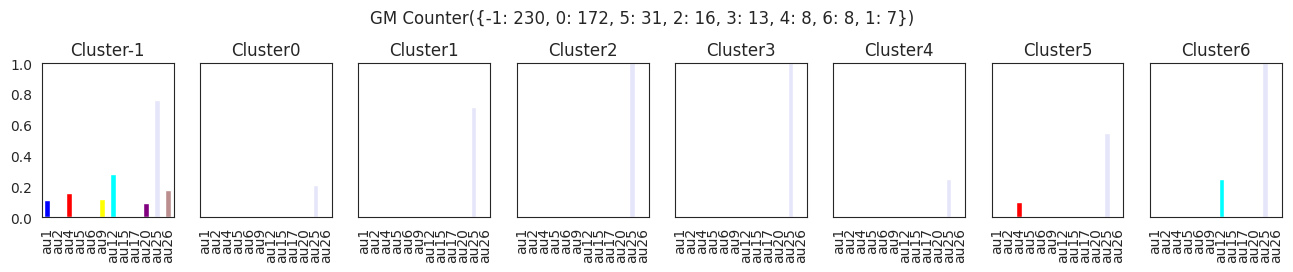

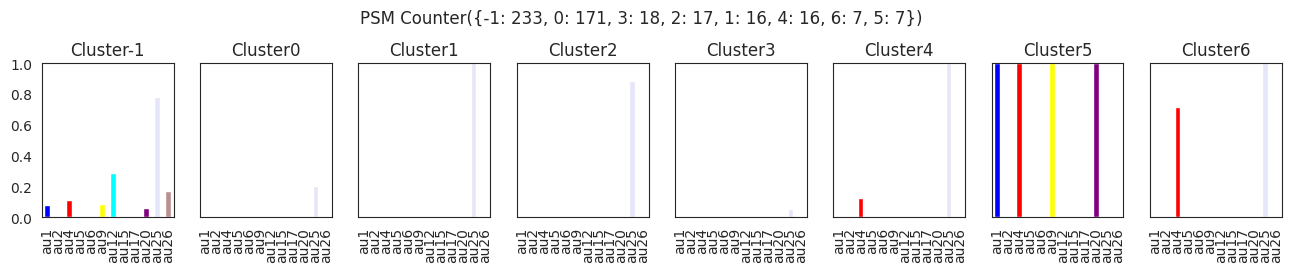

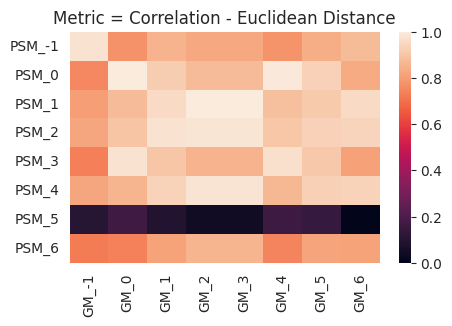

+--------+----------+----------+----------+-----------+-----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_1 |      GM_2 |      GM_3 |     GM_4 |     GM_5 |     GM_6 |
|--------+----------+----------+----------+-----------+-----------+----------+----------+----------|
| PSM_-1 | 0.97313  | 0.774924 | 0.852444 | 0.829102  | 0.829102  | 0.781172 | 0.841073 | 0.874646 |
| PSM_0  | 0.753773 | 0.99929  | 0.92177  | 0.877911  | 0.877911  | 0.993043 | 0.92999  | 0.834782 |
| PSM_1  | 0.802445 | 0.87862  | 0.95614  | 1         | 1         | 0.884868 | 0.913426 | 0.956871 |
| PSM_2  | 0.820505 | 0.89668  | 0.9742   | 0.98194   | 0.98194   | 0.902928 | 0.931486 | 0.938811 |
| PSM_3  | 0.730882 | 0.976398 | 0.898879 | 0.855019  | 0.855019  | 0.970151 | 0.907099 | 0.81189  |
| PSM_4  | 0.822635 | 0.858229 | 0.935749 | 0.979609  | 0.979609  | 0.864477 | 0.926137 | 0.936044 |
| PSM_5  | 0.105091 | 0.167595 | 0.090075 | 0.0462152 | 0.0462152 | 0.161347 | 0.141939 | 0

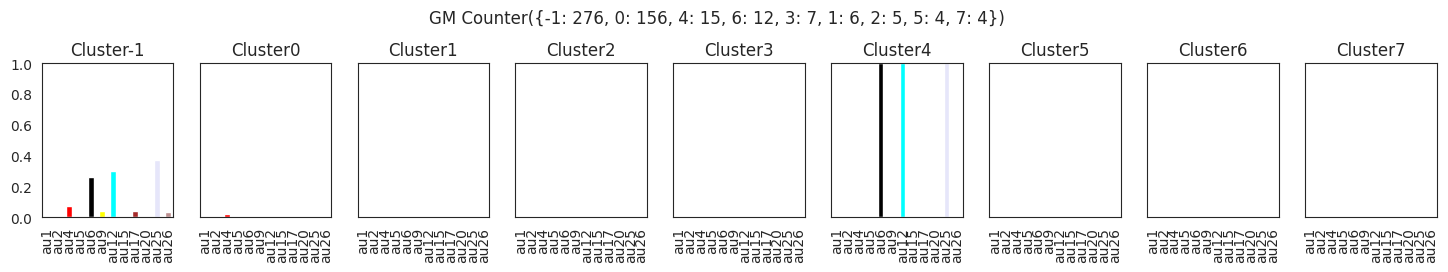

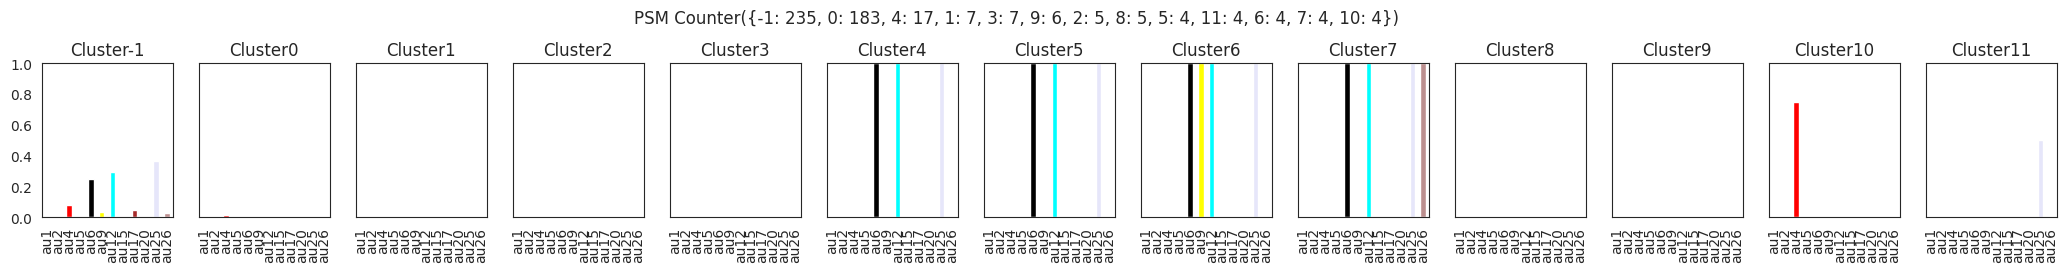

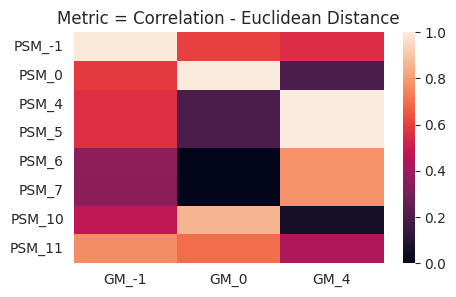

+--------+----------+-------------+-----------+
|        |    GM_-1 |        GM_0 |      GM_4 |
|--------+----------+-------------+-----------|
| PSM_-1 | 0.989835 | 0.597904    | 0.558141  |
| PSM_0  | 0.588711 | 0.999458    | 0.199135  |
| PSM_4  | 0.561208 | 0.198593    | 1         |
| PSM_5  | 0.561208 | 0.198593    | 1         |
| PSM_6  | 0.358435 | 0           | 0.773814  |
| PSM_7  | 0.353768 | 1.69745e-16 | 0.773814  |
| PSM_10 | 0.471324 | 0.860338    | 0.0589313 |
| PSM_11 | 0.762327 | 0.692277    | 0.430902  |
+--------+----------+-------------+-----------+
Novel Clusters from PSM : ['PSM_6', 'PSM_7', 'PSM_11']
Novel Clusters from GM : []
SN016


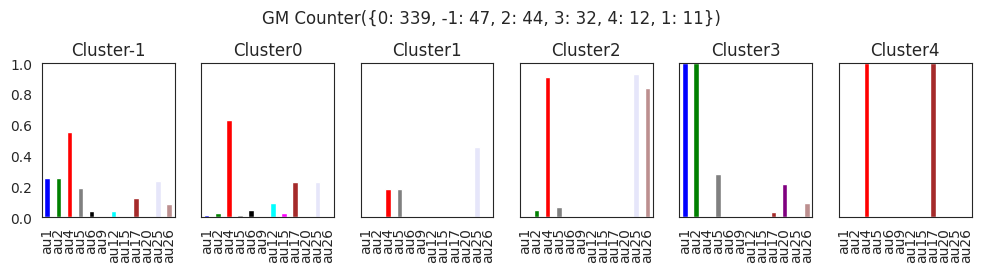

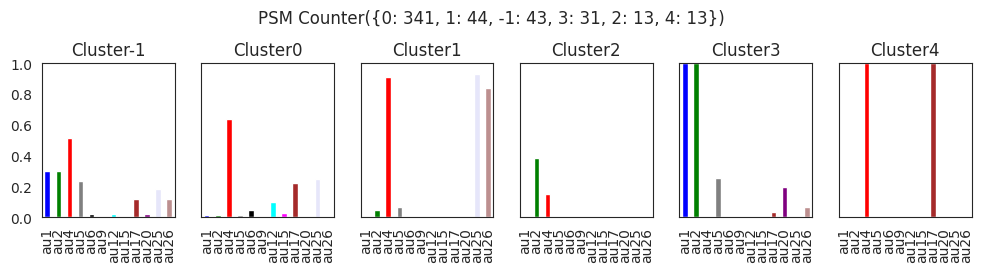

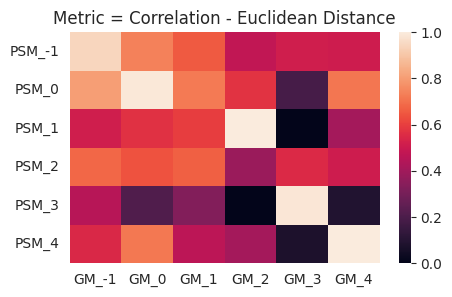

+--------+----------+----------+----------+------------+-----------+-----------+
|        |    GM_-1 |     GM_0 |     GM_1 |       GM_2 |      GM_3 |      GM_4 |
|--------+----------+----------+----------+------------+-----------+-----------|
| PSM_-1 | 0.944249 | 0.736284 | 0.654492 | 0.475778   | 0.513897  | 0.505257  |
| PSM_0  | 0.801814 | 0.991199 | 0.720331 | 0.573538   | 0.185944  | 0.713239  |
| PSM_1  | 0.515269 | 0.568824 | 0.596146 | 1          | 0         | 0.408677  |
| PSM_2  | 0.680717 | 0.637957 | 0.666383 | 0.384136   | 0.548625  | 0.506777  |
| PSM_3  | 0.450502 | 0.209565 | 0.328832 | 0.00216877 | 0.987418  | 0.0892931 |
| PSM_4  | 0.543023 | 0.717482 | 0.462646 | 0.408677   | 0.0753623 | 1         |
+--------+----------+----------+----------+------------+-----------+-----------+
Novel Clusters from PSM : ['PSM_2']
Novel Clusters from GM : ['GM_1']
SN017


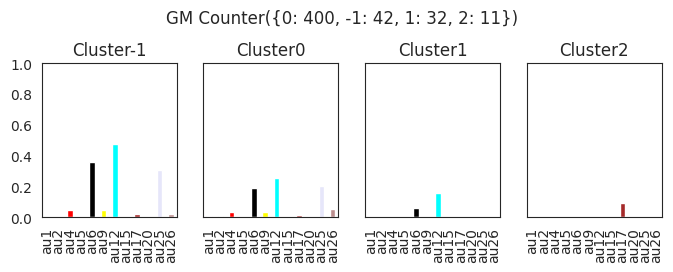

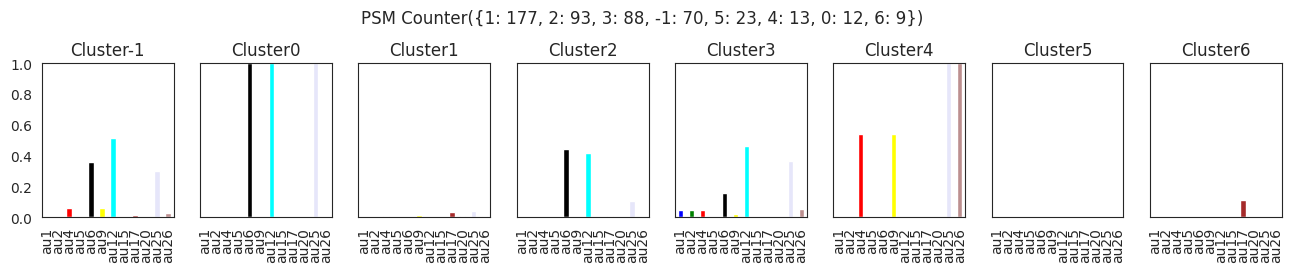

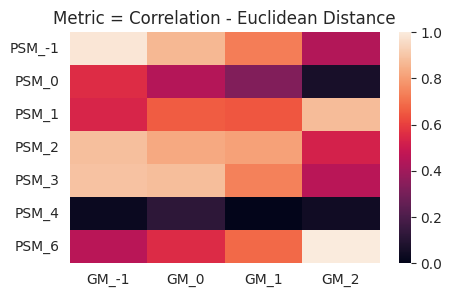

+--------+----------+----------+----------+-----------+
|        |    GM_-1 |     GM_0 |     GM_1 |      GM_2 |
|--------+----------+----------+----------+-----------|
| PSM_-1 | 0.986221 | 0.865443 | 0.729286 | 0.440424  |
| PSM_0  | 0.557952 | 0.44509  | 0.326635 | 0.0658813 |
| PSM_1  | 0.538729 | 0.659899 | 0.648385 | 0.876417  |
| PSM_2  | 0.882866 | 0.829442 | 0.810311 | 0.524178  |
| PSM_3  | 0.89091  | 0.879566 | 0.734451 | 0.454368  |
| PSM_4  | 0.028976 | 0.119146 | 0        | 0.0432224 |
| PSM_6  | 0.453508 | 0.551231 | 0.684933 | 1         |
+--------+----------+----------+----------+-----------+
Novel Clusters from PSM : ['PSM_0', 'PSM_4']
Novel Clusters from GM : []
SN021


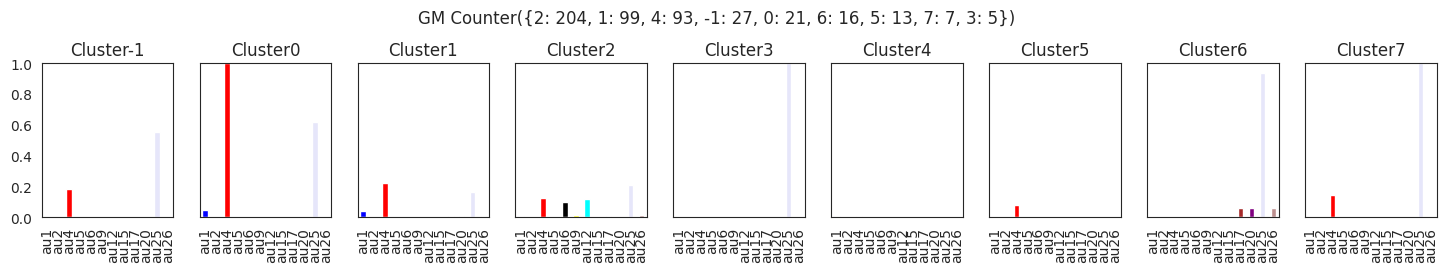

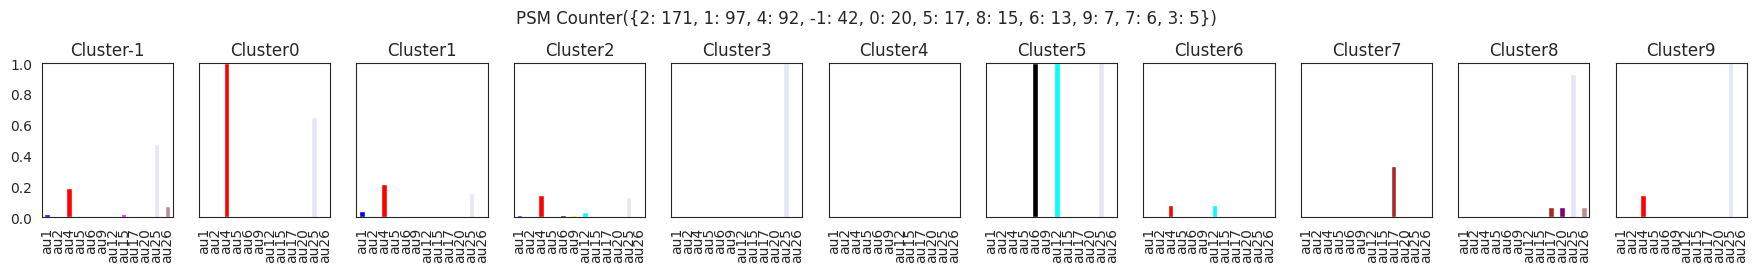

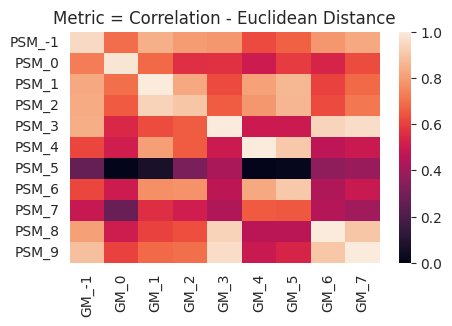

+--------+----------+----------+-----------+----------+----------+------------+-----------+----------+----------+
|        |    GM_-1 |     GM_0 |      GM_1 |     GM_2 |     GM_3 |       GM_4 |      GM_5 |     GM_6 |     GM_7 |
|--------+----------+----------+-----------+----------+----------+------------+-----------+----------+----------|
| PSM_-1 | 0.94981  | 0.693477 | 0.84385   | 0.799465 | 0.787541 | 0.622144   | 0.667891  | 0.785923 | 0.830651 |
| PSM_0  | 0.729561 | 0.98146  | 0.686229  | 0.565555 | 0.567635 | 0.503504   | 0.593488  | 0.533877 | 0.628581 |
| PSM_1  | 0.827395 | 0.698985 | 0.996689  | 0.829988 | 0.624328 | 0.808903   | 0.865933  | 0.6057   | 0.684147 |
| PSM_2  | 0.835532 | 0.654494 | 0.935768  | 0.899242 | 0.658423 | 0.788814   | 0.862439  | 0.622746 | 0.715124 |
| PSM_3  | 0.84115  | 0.544101 | 0.627078  | 0.659202 | 1        | 0.498871   | 0.496202  | 0.940636 | 0.964423 |
| PSM_4  | 0.615839 | 0.51433  | 0.804095  | 0.658749 | 0.498817 | 0.999946   | 0.906408

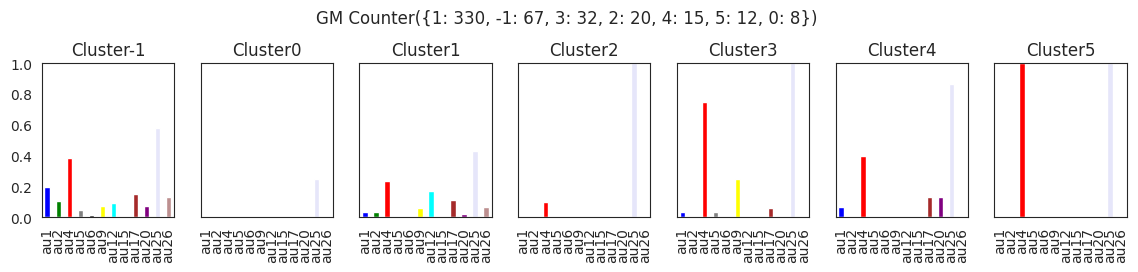

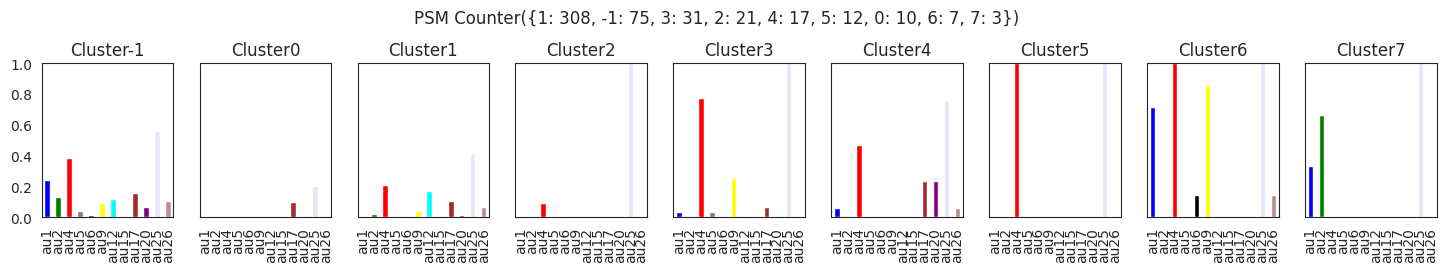

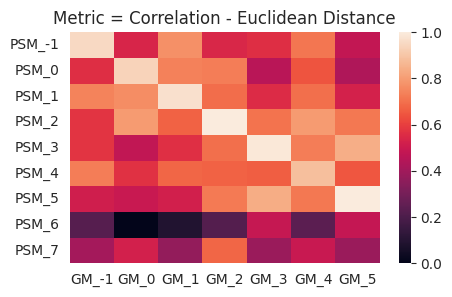

+--------+----------+----------+-----------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |      GM_1 |     GM_2 |     GM_3 |     GM_4 |     GM_5 |
|--------+----------+----------+-----------+----------+----------+----------+----------|
| PSM_-1 | 0.949299 | 0.536885 | 0.771164  | 0.540954 | 0.559429 | 0.714181 | 0.48029  |
| PSM_0  | 0.558669 | 0.935943 | 0.736898  | 0.727007 | 0.455969 | 0.642059 | 0.43176  |
| PSM_1  | 0.740353 | 0.762766 | 0.969257  | 0.695149 | 0.554432 | 0.696998 | 0.525523 |
| PSM_2  | 0.574581 | 0.793323 | 0.671085  | 0.998839 | 0.706172 | 0.794488 | 0.717074 |
| PSM_3  | 0.576358 | 0.475818 | 0.56416   | 0.696683 | 0.991137 | 0.729927 | 0.842901 |
| PSM_4  | 0.72696  | 0.567633 | 0.677258  | 0.670813 | 0.661982 | 0.886496 | 0.645914 |
| PSM_5  | 0.514516 | 0.495141 | 0.518499  | 0.719011 | 0.839554 | 0.716692 | 1        |
| PSM_6  | 0.225481 | 0        | 0.0885984 | 0.219327 | 0.487801 | 0.236479 | 0.483857 |
| PSM_7  | 0.408684 |

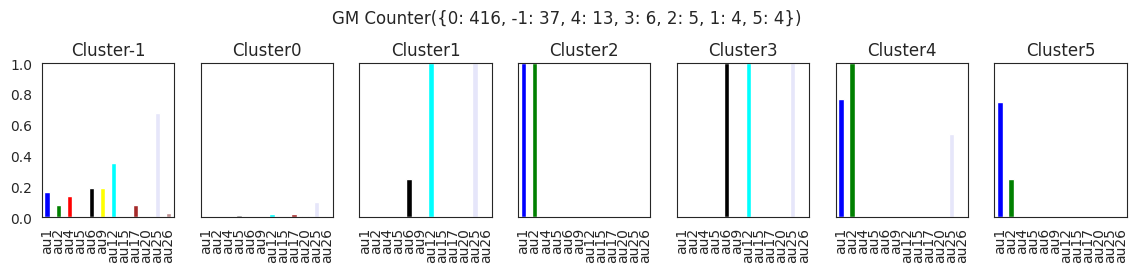

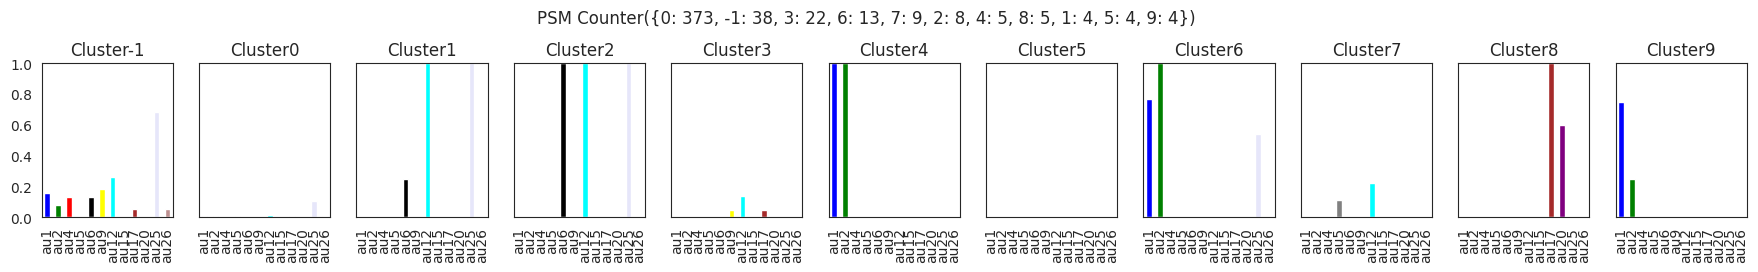

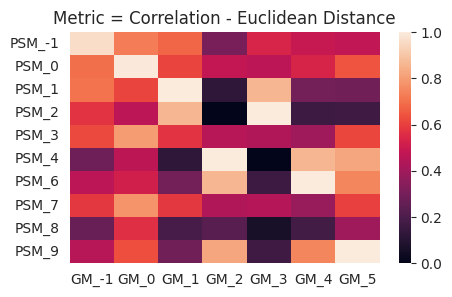

+--------+----------+----------+----------+----------+-----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_1 |     GM_2 |      GM_3 |     GM_4 |     GM_5 |
|--------+----------+----------+----------+----------+-----------+----------+----------|
| PSM_-1 | 0.962238 | 0.727867 | 0.678514 | 0.308374 | 0.537918  | 0.491728 | 0.476295 |
| PSM_0  | 0.697464 | 0.992576 | 0.610895 | 0.478839 | 0.46312   | 0.531583 | 0.641081 |
| PSM_1  | 0.706957 | 0.611926 | 1        | 0.124863 | 0.860712  | 0.29502  | 0.289109 |
| PSM_2  | 0.570602 | 0.461201 | 0.860712 | 0        | 1         | 0.160757 | 0.164863 |
| PSM_3  | 0.618922 | 0.800609 | 0.574111 | 0.449771 | 0.430532  | 0.392237 | 0.613808 |
| PSM_4  | 0.282156 | 0.465923 | 0.124863 | 1        | 0         | 0.860215 | 0.820565 |
| PSM_6  | 0.461718 | 0.516225 | 0.29502  | 0.860215 | 0.160757  | 1        | 0.746157 |
| PSM_7  | 0.583408 | 0.780389 | 0.585424 | 0.437346 | 0.443184  | 0.380907 | 0.600827 |
| PSM_8  | 0.268344 |

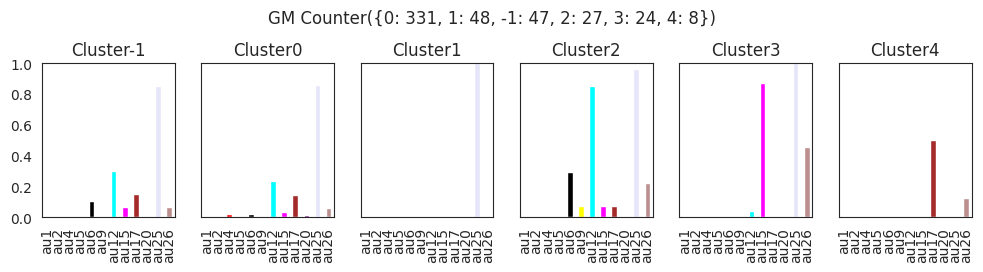

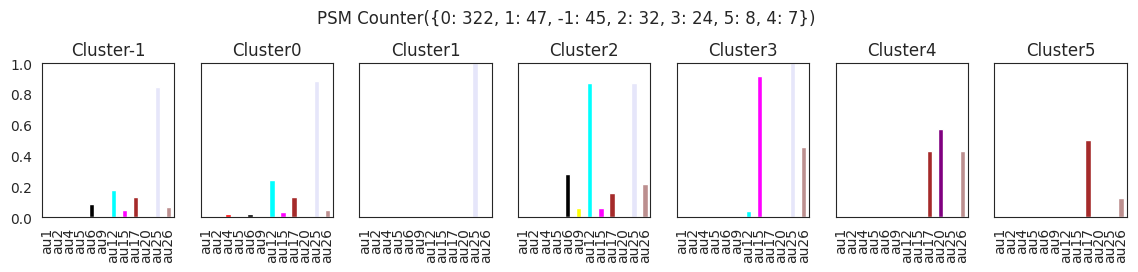

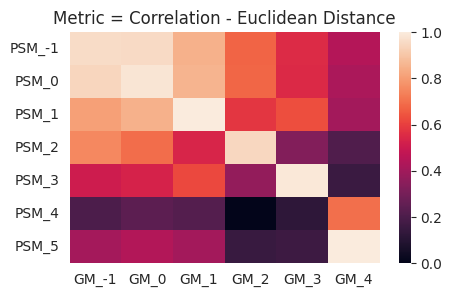

+--------+----------+----------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_1 |     GM_2 |     GM_3 |     GM_4 |
|--------+----------+----------+----------+----------+----------+----------|
| PSM_-1 | 0.958425 | 0.956226 | 0.848307 | 0.67556  | 0.55253  | 0.44267  |
| PSM_0  | 0.942269 | 0.984055 | 0.858881 | 0.677865 | 0.547582 | 0.42472  |
| PSM_1  | 0.804941 | 0.847801 | 1        | 0.580776 | 0.63279  | 0.40608  |
| PSM_2  | 0.752867 | 0.694839 | 0.536547 | 0.947846 | 0.331346 | 0.209344 |
| PSM_3  | 0.506445 | 0.528649 | 0.620353 | 0.369683 | 0.990887 | 0.152795 |
| PSM_4  | 0.19945  | 0.240347 | 0.218925 | 0        | 0.122779 | 0.697848 |
| PSM_5  | 0.408918 | 0.439411 | 0.40608  | 0.152122 | 0.162159 | 1        |
+--------+----------+----------+----------+----------+----------+----------+
Novel Clusters from PSM : ['PSM_4']
Novel Clusters from GM : []
SN026


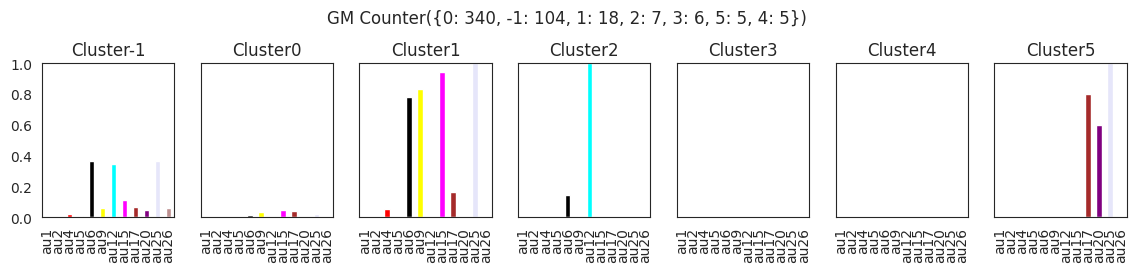

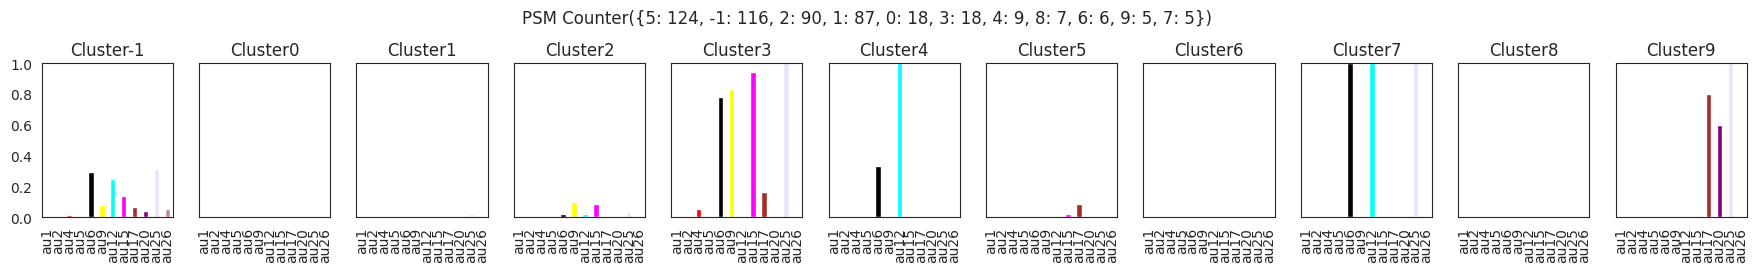

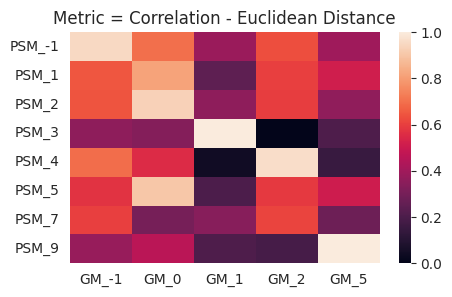

+--------+----------+----------+-----------+----------+----------+
|        |    GM_-1 |     GM_0 |      GM_1 |     GM_2 |     GM_5 |
|--------+----------+----------+-----------+----------+----------|
| PSM_-1 | 0.949564 | 0.696848 | 0.383301  | 0.631024 | 0.395151 |
| PSM_1  | 0.648259 | 0.814325 | 0.242441  | 0.60078  | 0.512224 |
| PSM_2  | 0.644256 | 0.933146 | 0.356091  | 0.593976 | 0.362376 |
| PSM_3  | 0.358974 | 0.333316 | 1         | 0        | 0.204219 |
| PSM_4  | 0.692936 | 0.552636 | 0.0444246 | 0.964272 | 0.148489 |
| PSM_5  | 0.570528 | 0.904268 | 0.201076  | 0.589737 | 0.50512  |
| PSM_7  | 0.600635 | 0.303296 | 0.341209  | 0.611758 | 0.280853 |
| PSM_9  | 0.376299 | 0.45926  | 0.204219  | 0.18574  | 1        |
+--------+----------+----------+-----------+----------+----------+
Novel Clusters from PSM : ['PSM_7']
Novel Clusters from GM : []
SN027


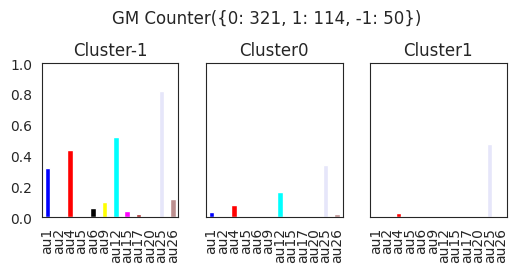

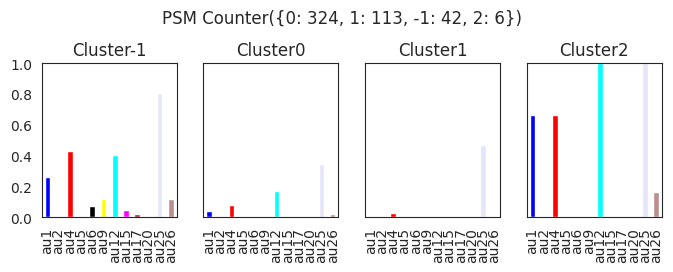

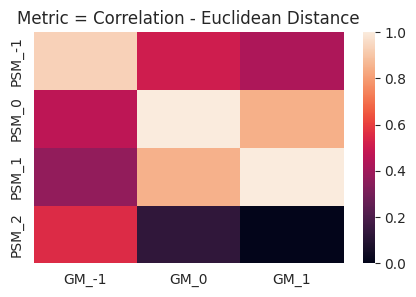

+--------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_1 |
|--------+----------+----------+----------|
| PSM_-1 | 0.929791 | 0.510068 | 0.426578 |
| PSM_0  | 0.467428 | 0.99719  | 0.845806 |
| PSM_1  | 0.363899 | 0.851165 | 1        |
| PSM_2  | 0.552096 | 0.127306 | 0        |
+--------+----------+----------+----------+
Novel Clusters from PSM : ['PSM_2']
Novel Clusters from GM : []
SN028


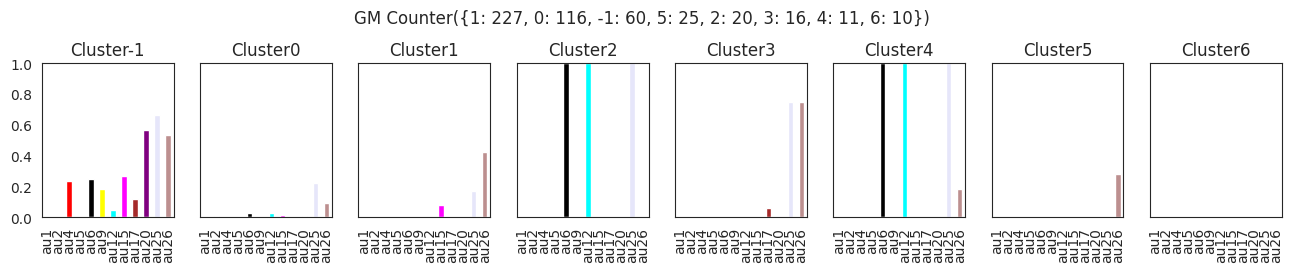

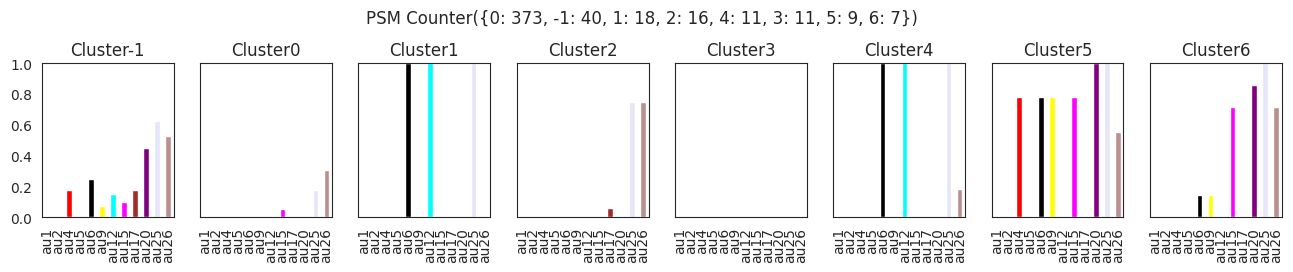

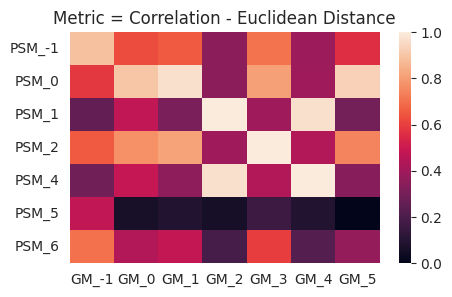

+--------+----------+-----------+-----------+-----------+----------+-----------+----------+
|        |    GM_-1 |      GM_0 |      GM_1 |      GM_2 |     GM_3 |      GM_4 |     GM_5 |
|--------+----------+-----------+-----------+-----------+----------+-----------+----------|
| PSM_-1 | 0.887702 | 0.628063  | 0.655393  | 0.351316  | 0.705771 | 0.389513  | 0.560535 |
| PSM_0  | 0.584131 | 0.900744  | 0.971388  | 0.351133  | 0.807481 | 0.395975  | 0.931922 |
| PSM_1  | 0.254069 | 0.475408  | 0.310856  | 1         | 0.397169 | 0.970194  | 0.2959   |
| PSM_2  | 0.65392  | 0.772552  | 0.813621  | 0.397169  | 1        | 0.438967  | 0.745557 |
| PSM_4  | 0.290642 | 0.483261  | 0.356615  | 0.970194  | 0.438967 | 1         | 0.342861 |
| PSM_5  | 0.474756 | 0.0640136 | 0.0932699 | 0.0605195 | 0.161083 | 0.0907563 | 0        |
| PSM_6  | 0.701588 | 0.437951  | 0.477076  | 0.184448  | 0.595739 | 0.219613  | 0.37387  |
+--------+----------+-----------+-----------+-----------+----------+-----------+

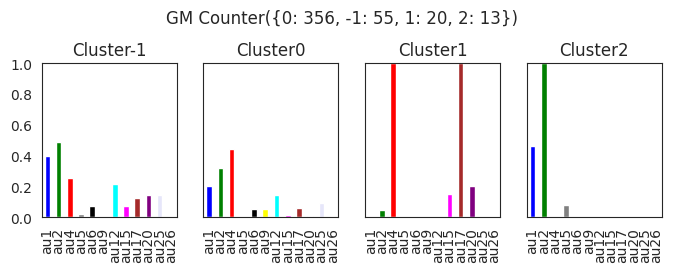

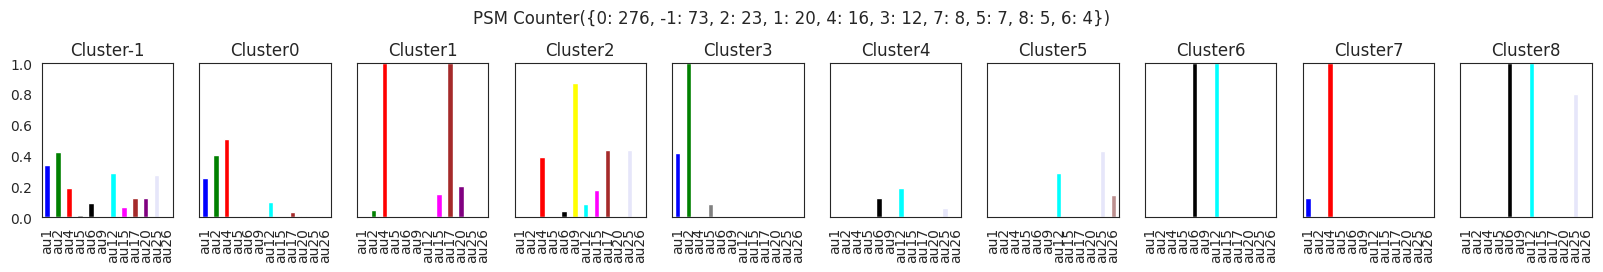

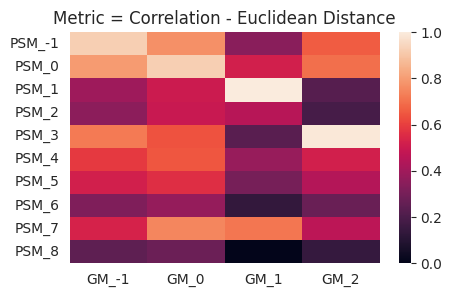

+--------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_1 |     GM_2 |
|--------+----------+----------+----------+----------|
| PSM_-1 | 0.922013 | 0.769959 | 0.345942 | 0.659447 |
| PSM_0  | 0.79514  | 0.925222 | 0.518258 | 0.698039 |
| PSM_1  | 0.392612 | 0.501523 | 1        | 0.226322 |
| PSM_2  | 0.352362 | 0.4931   | 0.452886 | 0.184784 |
| PSM_3  | 0.720642 | 0.63959  | 0.232721 | 0.991998 |
| PSM_4  | 0.587005 | 0.645376 | 0.376512 | 0.517631 |
| PSM_5  | 0.519056 | 0.562392 | 0.302513 | 0.443632 |
| PSM_6  | 0.322613 | 0.374218 | 0.133446 | 0.273287 |
| PSM_7  | 0.529781 | 0.747631 | 0.711499 | 0.462335 |
| PSM_8  | 0.242316 | 0.276092 | 0        | 0.141991 |
+--------+----------+----------+----------+----------+
Novel Clusters from PSM : ['PSM_2', 'PSM_4', 'PSM_5', 'PSM_6', 'PSM_7', 'PSM_8']
Novel Clusters from GM : []
SN030


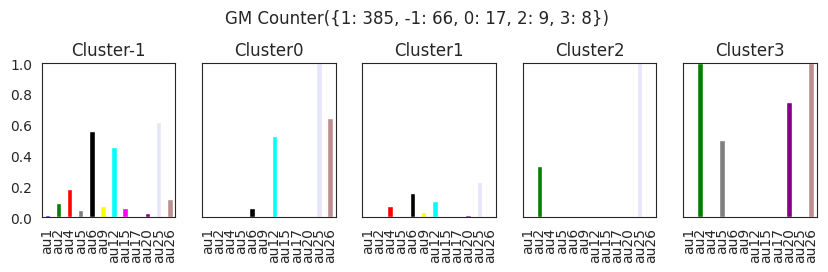

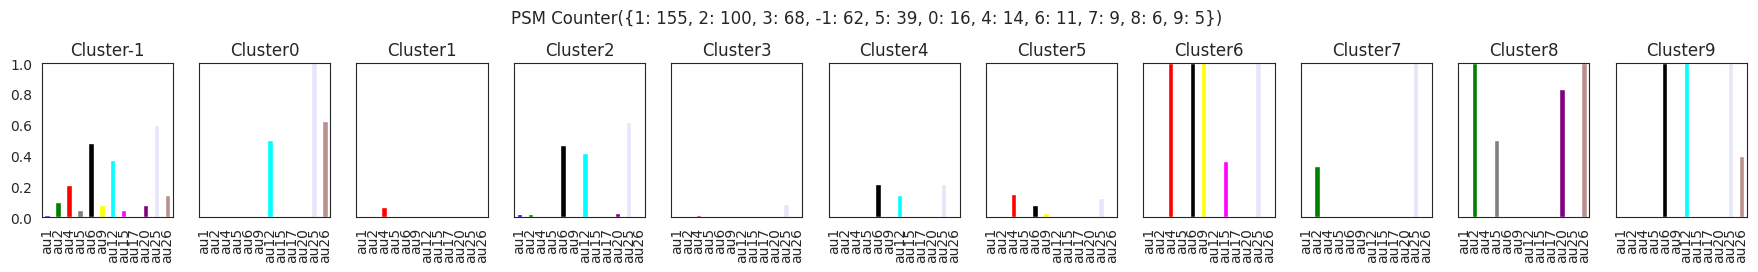

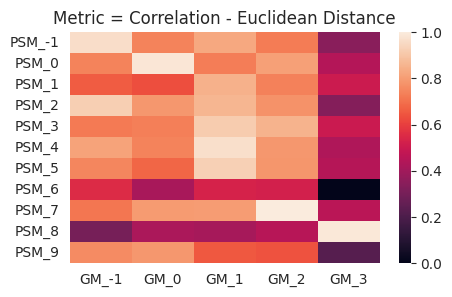

+--------+----------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_1 |     GM_2 |     GM_3 |
|--------+----------+----------+----------+----------+----------|
| PSM_-1 | 0.964686 | 0.739837 | 0.827191 | 0.724631 | 0.346662 |
| PSM_0  | 0.741966 | 0.987783 | 0.729431 | 0.806918 | 0.443139 |
| PSM_1  | 0.65732  | 0.629326 | 0.848637 | 0.735949 | 0.503009 |
| PSM_2  | 0.922496 | 0.78581  | 0.86304  | 0.777244 | 0.334811 |
| PSM_3  | 0.721664 | 0.733233 | 0.915643 | 0.854344 | 0.498098 |
| PSM_4  | 0.81276  | 0.739589 | 0.966671 | 0.786889 | 0.431125 |
| PSM_5  | 0.749743 | 0.676902 | 0.926624 | 0.782255 | 0.449088 |
| PSM_6  | 0.553902 | 0.415589 | 0.528164 | 0.522449 | 0        |
| PSM_7  | 0.713939 | 0.793013 | 0.797056 | 1        | 0.460228 |
| PSM_8  | 0.304299 | 0.425106 | 0.410616 | 0.45044  | 0.990739 |
| PSM_9  | 0.760331 | 0.788258 | 0.651376 | 0.638604 | 0.223442 |
+--------+----------+----------+----------+----------+----------+
Novel Clus

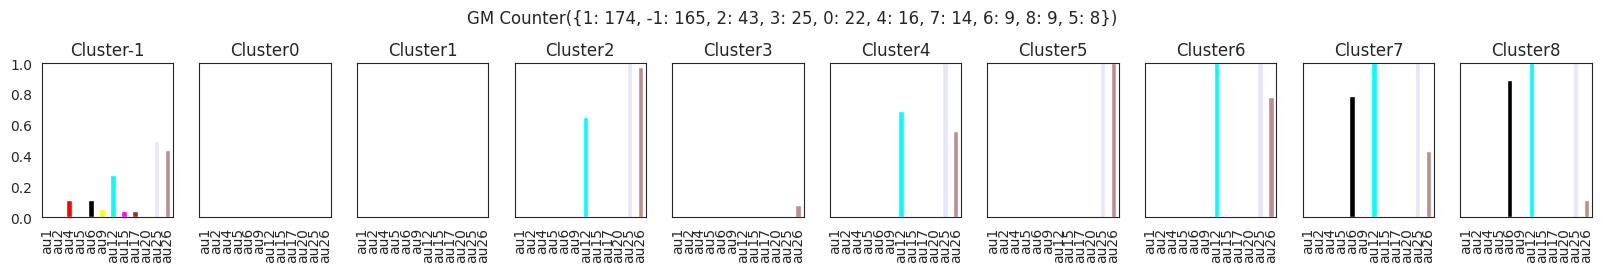

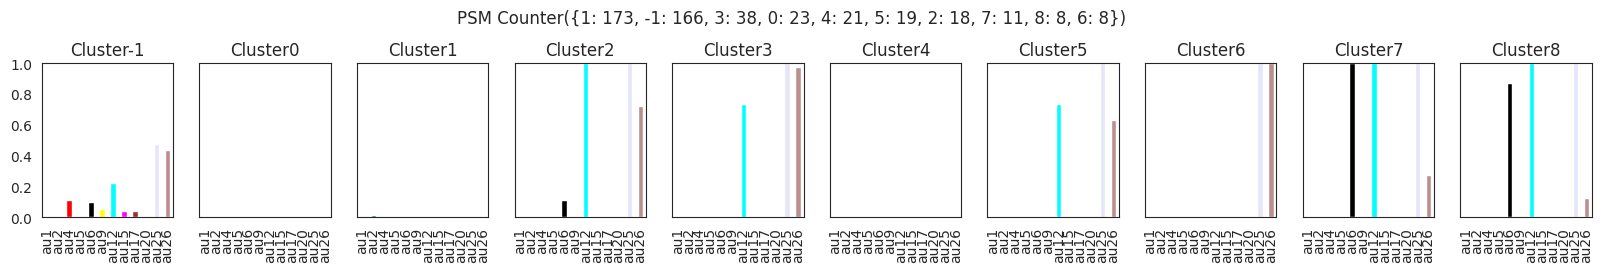

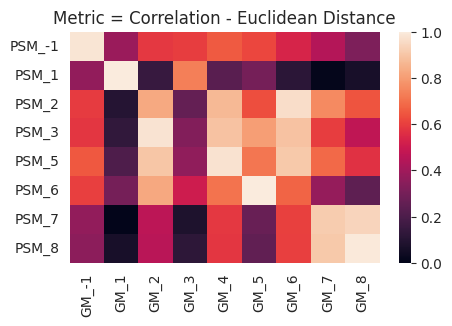

+--------+----------+-----------+----------+----------+----------+----------+----------+-----------+-----------+
|        |    GM_-1 |      GM_1 |     GM_2 |     GM_3 |     GM_4 |     GM_5 |     GM_6 |      GM_7 |      GM_8 |
|--------+----------+-----------+----------+----------+----------+----------+----------+-----------+-----------|
| PSM_-1 | 0.981189 | 0.38323   | 0.584592 | 0.596993 | 0.656184 | 0.615883 | 0.53493  | 0.444158  | 0.319399  |
| PSM_1  | 0.365684 | 0.999978  | 0.148299 | 0.7315   | 0.232077 | 0.296896 | 0.114737 | 0.0103495 | 0.0630396 |
| PSM_2  | 0.589873 | 0.100135  | 0.831621 | 0.258214 | 0.867327 | 0.631496 | 0.96264  | 0.757127  | 0.640861  |
| PSM_3  | 0.579833 | 0.129661  | 0.980177 | 0.328598 | 0.891226 | 0.801897 | 0.893222 | 0.595065  | 0.469114  |
| PSM_5  | 0.649629 | 0.205424  | 0.898465 | 0.360574 | 0.973713 | 0.711264 | 0.9075   | 0.68412   | 0.566952  |
| PSM_6  | 0.600981 | 0.296918  | 0.827439 | 0.507355 | 0.706421 | 1        | 0.672027 | 0.37248

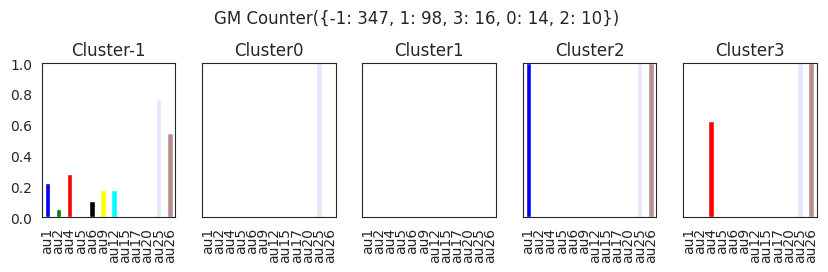

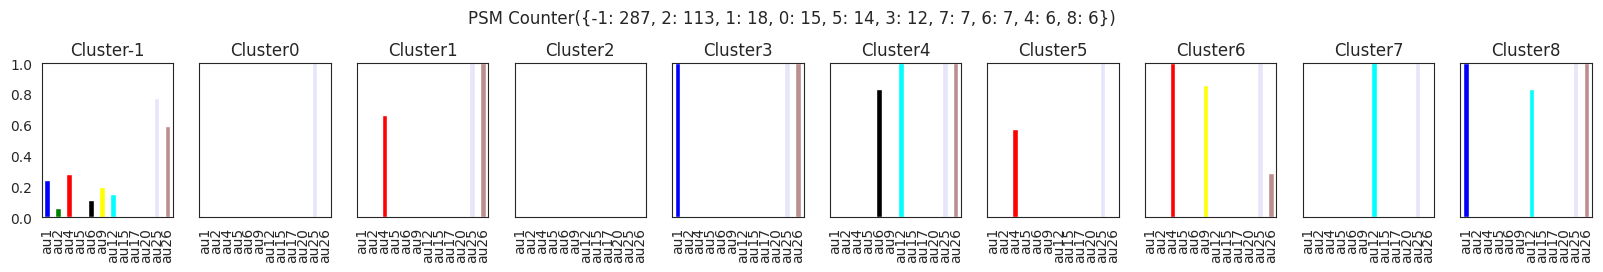

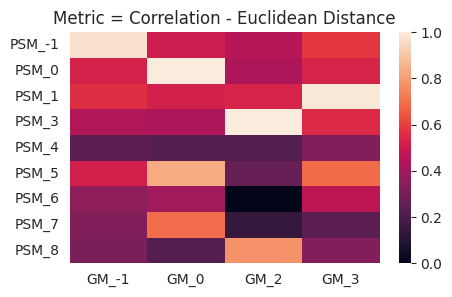

+--------+----------+----------+----------+----------+
|        |    GM_-1 |     GM_0 |     GM_2 |     GM_3 |
|--------+----------+----------+----------+----------|
| PSM_-1 | 0.969042 | 0.50448  | 0.451478 | 0.578529 |
| PSM_0  | 0.527377 | 1        | 0.42847  | 0.534164 |
| PSM_1  | 0.559664 | 0.522595 | 0.535567 | 0.9903   |
| PSM_3  | 0.431433 | 0.42847  | 1        | 0.547829 |
| PSM_4  | 0.23688  | 0.220118 | 0.217715 | 0.328773 |
| PSM_5  | 0.522955 | 0.8353   | 0.264394 | 0.690147 |
| PSM_6  | 0.35745  | 0.401012 | 0        | 0.468653 |
| PSM_7  | 0.330895 | 0.694187 | 0.136904 | 0.238417 |
| PSM_8  | 0.310836 | 0.220118 | 0.776888 | 0.328773 |
+--------+----------+----------+----------+----------+
Novel Clusters from PSM : ['PSM_4', 'PSM_6', 'PSM_7', 'PSM_8']
Novel Clusters from GM : []


In [9]:
sns.set_style("white")

different_PSM_clusters=[]
different_GM_clusters=[]

for SN in dict_clusters.keys():
    print(SN)
    for model_type in ["GM","PSM"]:        
        df = dict_clusters[SN][model_type]
        ncols= len(df.label.unique()) # one column per cluster
        
        count=0  
        fig,axs = plt.subplots(nrows=1,ncols=ncols,figsize=(ncols*2,2))
        sum_AUs_per_label = [[df[df.label==i][au].sum()/len(df.loc[df.label==i])
                              for i in sorted(df["label"].unique())] for au in [l+"_bis" for l in AUs]]
        sum_AUs_per_label_dict = { AUs[i] : sum_AUs_per_label[i] for i in range(len(AUs)) }
        if model_type=="GM":
            df_AU_GM = pd.DataFrame(sum_AUs_per_label_dict, index=sorted(df["label"].unique()))
            tmp = df_AU_GM
        else:
            df_AU_PSM = pd.DataFrame(sum_AUs_per_label_dict, index=sorted(df["label"].unique()))
            tmp = df_AU_PSM
        for cluster in tmp.index:
            tmp.loc[cluster].plot.bar(stacked=False,color=list(colors_aus.values()),
                                           title="Cluster"+str(cluster),legend=False,ax=axs[count])
            if count>0:
                axs[count].yaxis.set_ticklabels([])
            axs[count].set_ylim(0,1)
            count+=1
        plt.suptitle(model_type+" "+str(Counter(df.label)),y=1.15)
        plt.show()
    

    
    # Prepare PSM and GM data for correlation matrices
    
    df_PSM_to_use = df_AU_PSM.copy().T
    df_PSM_to_use = df_PSM_to_use.loc[:, df_PSM_to_use.any()]
    df_GM_to_use = df_AU_GM.copy().T
    df_GM_to_use = df_GM_to_use.loc[:, df_GM_to_use.any()]
    df_PSM_to_use.columns = ["PSM_"+str(col)  for col in df_PSM_to_use.columns]
    df_GM_to_use.columns = ["GM_"+str(col)  for col in df_GM_to_use.columns]

    # Prepare correlation matrix    
    df_concat = pd.concat([df_PSM_to_use,df_GM_to_use],axis=1)
    df_concat_corr = df_concat.corr().loc[
            [l for l in df_concat.columns if "PSM" in l],[l for l in df_concat.columns if "GM" in l]]

    # Prepare euclidean distance matrix
    df_dist = pd.DataFrame(columns= df_GM_to_use.columns, index=df_PSM_to_use.columns)
    for ind in df_dist.index:
        df_dist.loc[ind] = [np.abs(df_concat[ind]-df_concat[gm_col]).sum() for gm_col in df_dist.columns]
    df_dist = df_dist.astype("float")

    
    # Metric = correlation - euclidean distance

    new_metric_df = df_concat_corr-df_dist
    max_val = new_metric_df.max().max()
    min_val = new_metric_df.min().min()
    new_metric_df = (new_metric_df-min_val)/(max_val-min_val)
    new_metric_df = new_metric_df.astype("float")
    
    # Plot metric heatmap
    fig, ax = plt.subplots(ncols=1,figsize=(5,3))
    sns.heatmap(new_metric_df,ax=ax)
    ax.set_title("Metric = Correlation - Euclidean Distance")
    plt.show()
    
    # Plot matrix with metric values
    print(tabulate(new_metric_df, headers='keys', tablefmt='psql'))
    
    # Detect novel clusters with threshold 0.8:
    new_PSM = (new_metric_df > 0.8).any(axis=1)==False
    new_GM = (new_metric_df > 0.8).any(axis=0)==False   
    print("Novel Clusters from PSM :",new_PSM[new_PSM].index.values.tolist())
    print("Novel Clusters from GM :",new_GM[new_GM].index.values.tolist())
    different_PSM_clusters.append(new_PSM[new_PSM].index.values.tolist())
    different_GM_clusters.append(new_GM[new_GM].index.values.tolist())


# Behaviors of facial movements embedding analysis learned from General Model.

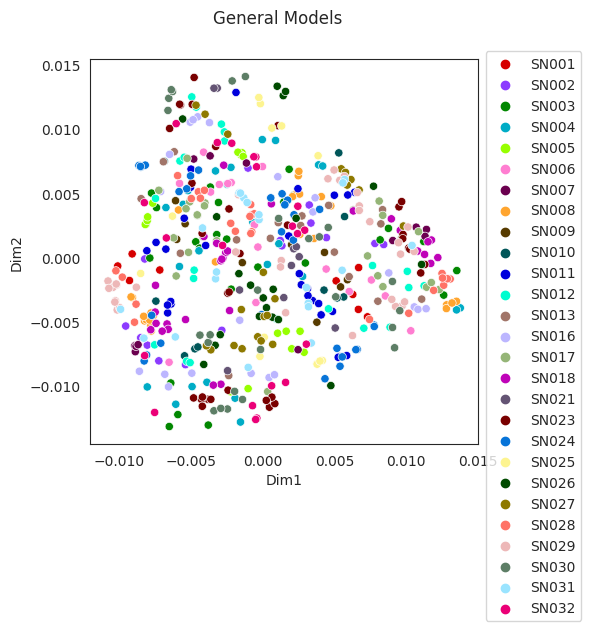

In [10]:
import pandas as pd
import colorcet as cc
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pickle

with open('../Results/GM_embeddings.pickle', 'rb') as handle:
    dict_GM_embeddings = pickle.load(handle)

AUs= ["au"+str(i) for i in [1,2,4,5,6,9,12,15,17,20,25,26]]

data = dict_GM_embeddings["GM_embeddings"]
custom_palette = sns.color_palette(cc.glasbey, n_colors=27)

f, ax = plt.subplots(1,1,figsize=(5,5))


sns.scatterplot(
    x="Dim1", y="Dim2",
    hue="SN",
    data=data,
    legend=True,
    alpha=1,
    ax=ax,
    palette=custom_palette
)

plt.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0)
plt.suptitle("General Models")
plt.show()

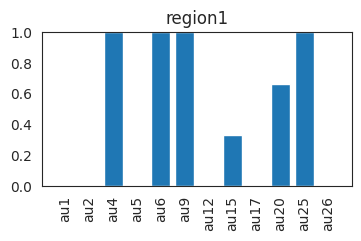

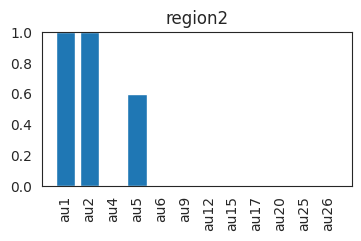

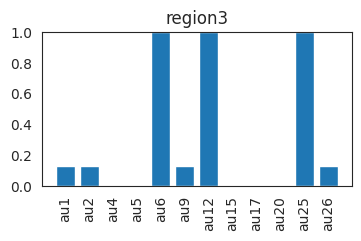

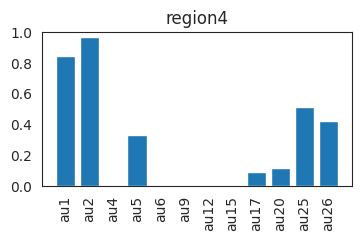

In [11]:
def plot_region_with_AUs(data_subset):
    
    data_plot = data.copy()
    plt.figure(figsize=(4,2))
    sum_AUs = [data_subset[AU].sum()/len(data_subset) for AU in AUs]
    sum_AUs = { AUs[i] : sum_AUs[i] for i in range(len(AUs)) }
    plt.bar(sum_AUs.keys(),sum_AUs.values())
    plt.ylim(0,1)
    plt.xticks(rotation=90) 

for key in [l for l in dict_GM_embeddings.keys() if "region" in l]:
    plot_region_with_AUs(dict_GM_embeddings[key])
    plt.title(key.split("_")[-1])
    plt.show()


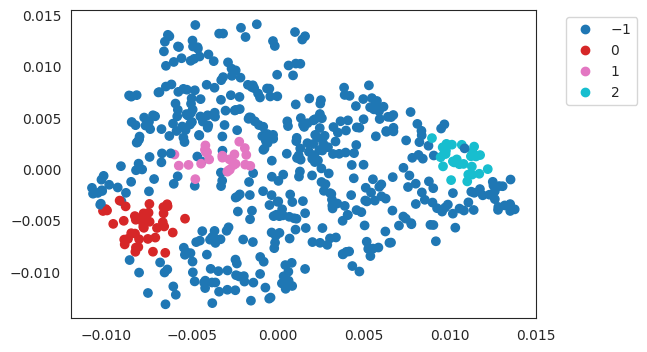

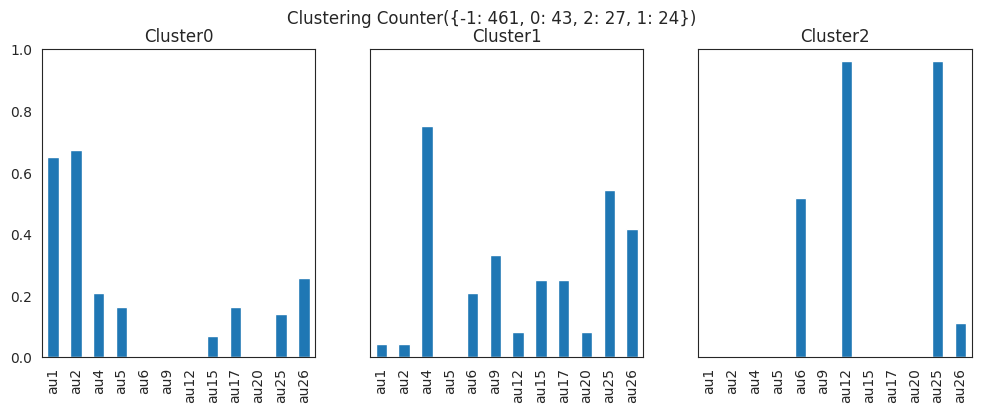

In [12]:
tmp = data.copy()
ncols= len(tmp.label.unique())-1 

# Color clusters in the SE space

fig = plt.figure(figsize=(6,4))
sc = plt.scatter(x=tmp["Dim1"], y=tmp["Dim2"],c=tmp.label,cmap="tab10")
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


# Plot AU frequencies

sum_AUs_per_label = [[tmp[tmp.label==i][au].sum()/len(tmp.loc[tmp.label==i])
                      for i in sorted(tmp["label"].unique())] for au in AUs]
sum_AUs_per_label_dict = { AUs[i] : sum_AUs_per_label[i] for i in range(len(AUs)) }
df = pd.DataFrame(sum_AUs_per_label_dict, index=sorted(tmp["label"].unique()))

count=0
fig,axs = plt.subplots(nrows=1,ncols=ncols)  
for cluster in df.index[1:]:
    df.loc[cluster].plot.bar(stacked=False,figsize=(ncols*4,4),
                             title="Cluster"+str(cluster),legend=False,ax=axs[count])
    if count>0:
        axs[count].yaxis.set_ticklabels([])
    axs[count].set_ylim(0,1)
    count+=1
plt.suptitle("Clustering "+str(Counter(tmp.label)))
plt.show()


# Reconstruction of the neutral face from random noise experiments from both General and Person-Specific Models.

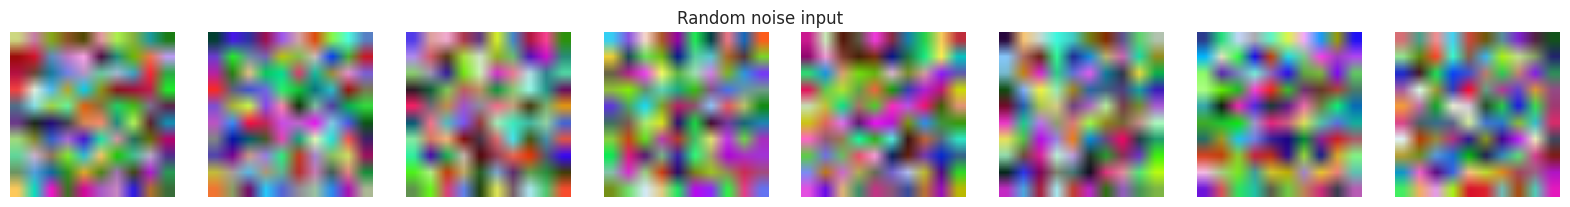

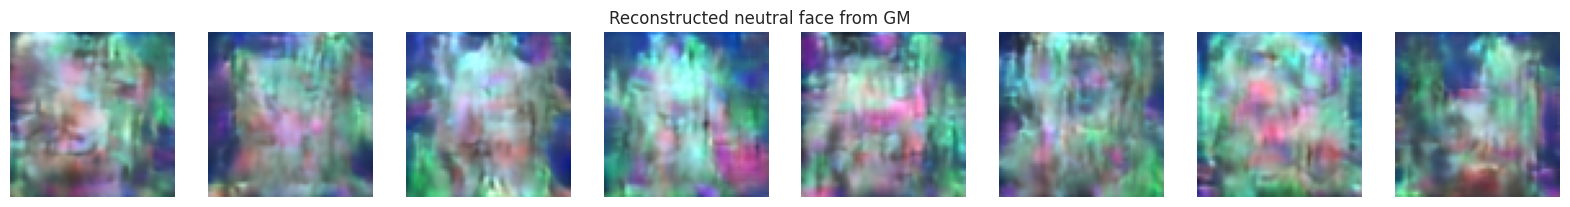

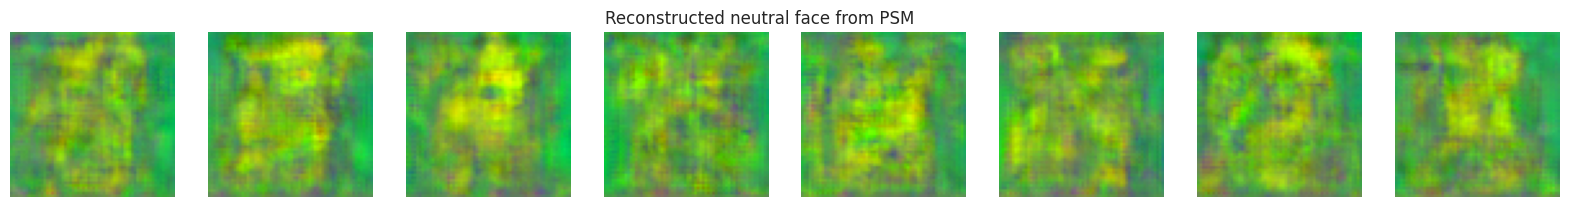

In [13]:
import pickle
with open('../Results/neu_face_dict_random.pickle', 'rb') as handle:
    neu_face_dict_random = pickle.load(handle)
import numpy as np    
import matplotlib.pyplot as plt

for key in neu_face_dict_random.keys():
    count=0
    fig,axs = plt.subplots(figsize=(20,10),ncols=8)
    for frame in neu_face_dict_random[key]:
        axs[count].imshow(np.array(frame).transpose((1, 2, 0)))
        axs[count].axis('off')
        count+=1
    if key =="Original_input":
        title = "Random noise input"
    else:
        title = "Reconstructed neutral face from " + key.split("_")[0]    
    plt.suptitle(title,y=0.6)
    plt.show()